## IBM-HR-Analytics-Attrition-Dataset

### Feature description
##### Age -Integer datatype. Gives the age of the employees. range - 18-60
##### Attrition - Gives the attrition rate of the employee.
##### BusinessTravel - Categorical feature. Describes about the type of travel the employee has gone. The categories are 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'
##### DailyRate - Rate at which the employee is working based on days
##### Department - Categorical value.Department under which the employee is working. The categories are 'Sales', 'Research & Development', 

'Human Resources'
##### DistanceFromHome - Numericalfeature. Distance from home to Working place.
##### Education  - Categorical feature. Diploma,Graduate, Bachelors, Masters, Phd
##### EducationField - Categorical Feature. Gives the Field in which the education of employee is. Categories are : 'Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'
##### EmployeeCount -Number of Employees present
##### EmployeeNumber - Employee number once enrolled.
##### EnvironmentSatisfaction - Categorical feature. Level 1 being lowest 4 being highest.
##### Gender - Male / Female
##### HourlyRate - rate at which the employees working based on hours
##### JobInvolvement - Categorical Feature. 1 being lowest and 4 being highest
##### JobLevel - Categorical Feature. 1 being lowest and 4 being highest
##### JobRole - Categorical feature. Role of the employee. Categories are 'Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Sales Representative', 'Research Director', 'Human Resources'
##### JobSatisfaction - Categorical Feature. Satisfaction employee gets. 1 being lowest , 4 being highest
##### MaritalStatus - Categorical Feature . Marital status of the employee. Categories are Single, Married, Divorced
##### MonthlyIncome   - Numerical feature. Monthly Income of the employee
##### MonthlyRate - Rate at which employee works on Month
##### NumCompaniesWorked - Companies the employee already worked.
##### Over18 - whether the employee is above 18 or not
##### OverTime - Categorical Feature. whether the employee has done overtime or not
##### PercentSalaryHike - Hike in salary in percentage
##### PerformanceRating - Rating of the employee
##### RelationshipSatisfaction - Categorical Feature.Satisfaction in relationship. 1 being lowest, 4 being highest
##### StandardHours - Employee working hours
##### StockOptionLevel - Stock Levels present in the company
##### TotalWorkingYears - Total number of years worked by employee
##### TrainingTimesLastYear - Training period of the employee
##### WorkLifeBalance - Categorical Feature. Work life balance. 1 being lowest 4 being highest
##### YearsAtCompany - No. of years employee worked in the companny.
##### YearsInCurrentRole - No. of years employee working in same role.
##### YearsSinceLastPromotion - No. of years since last promotion of the employee
##### YearsWithCurrManager - No. of years employee working with same manager

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# for modelling:

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics

# importing Classification models

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from statsmodels.tools import add_constant as add_constant

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve

In [3]:
ibm=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
ibm.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
ibm.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Single attribute visualization

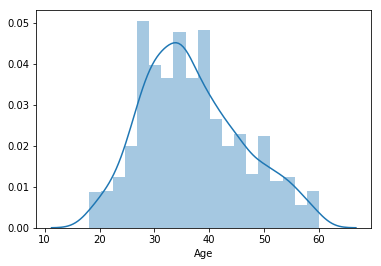

In [8]:
sns.distplot(ibm.Age)

In [9]:
ibm.Age.describe()

ibm[ibm['Age']< 20]['Age'].count()

17

In [10]:
print('Attrition rate  below age 20 is ',(ibm[(ibm['Age']< 20) 
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm[ibm['Age']< 20]['Age'].count()) * 100)

print('Attrition rate of age between 20 and 30 is ',(ibm[(ibm['Age']> 20) 
                                                            & (ibm['Age']<30)
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm['Age'].count()) * 100)

print('Attrition rate of age between 30 and 40 is ',(ibm[(ibm['Age']> 30) 
                                                            & (ibm['Age']<40)
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm[(ibm['Age']> 30) 
                                                            & (ibm['Age']<40)]['Age'].count()) * 100)

print('Attrition rate of age between 40 and 50 is ',(ibm[(ibm['Age']> 40) 
                                                            & (ibm['Age']<50)
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm[(ibm['Age']> 40) 
                                                            & (ibm['Age']<50)]['Age'].count()) * 100)
print('Attrition rate of age between 50 and 60 is ',(ibm[(ibm['Age']> 50) 
                                                            & (ibm['Age']<60)
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm[(ibm['Age']> 50) 
                                                            & (ibm['Age']<60)]['Age'].count()) * 100)

print('Attrition rate of age above 60 is ',(ibm[(ibm['Age']> 60) 
                                                            
                                                             & (ibm['Attrition']=='Yes')]['Age'].count() 
                                                         / ibm[ibm['Age']> 60]['Age'].count()) * 100)


Attrition rate  below age 20 is  58.82352941176471
Attrition rate of age between 20 and 30 is  5.1020408163265305
Attrition rate of age between 30 and 40 is  14.23487544483986
Attrition rate of age between 40 and 50 is  9.931506849315069
Attrition rate of age between 50 and 60 is  13.043478260869565
Attrition rate of age above 60 is  nan


#### from the graph, we can see that the age is overall distributed from 18 to 60 . 

#### and there is not much skewness

#### As the age increases, the number of people working is also decreasing.

In [11]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
ibm.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

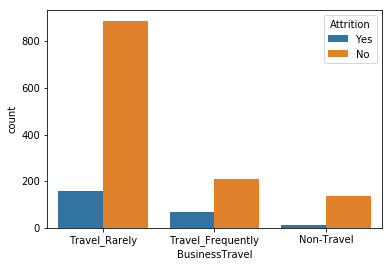

In [13]:
sns.countplot(ibm.BusinessTravel,hue=ibm.Attrition)

In [14]:
bt=ibm.BusinessTravel.unique()
bt

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [15]:
for i in bt:
    

    print('Percentage of attrition rate w.r.t BusinessTravel {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['BusinessTravel']==i)]['BusinessTravel'].count()
     /
     ibm[ibm['BusinessTravel']==i]['BusinessTravel'].count()) * 100)

Percentage of attrition rate w.r.t BusinessTravel Travel_Rarely is  14.956855225311601
Percentage of attrition rate w.r.t BusinessTravel Travel_Frequently is  24.90974729241877
Percentage of attrition rate w.r.t BusinessTravel Non-Travel is  8.0


#### from the value counts and count plot, we can see that ratio of people travelling rarely is more than that of the people who travel mostly
### and the people who travel frequently for business is also very less

##### --- need to check for the age groups among these BusinessTravel categories

#### attrition rate is more in travelled frequently group

In [16]:
ibm.DailyRate.describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

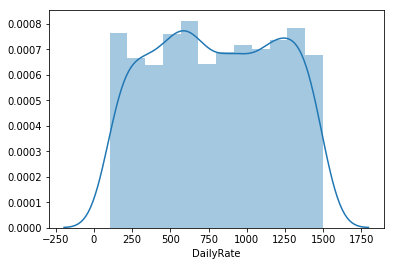

In [17]:
sns.distplot(ibm.DailyRate)

In [18]:
ibm.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### The attrition rate for yes and no is in the ratio 237:1233. That means most people are not changing jobs from ibm.

#### we should check on the other factors affecting this attrition rate.

#### In our dataset, Attrition rate is the dependant variable.

In [19]:
ibm.Department.describe()

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

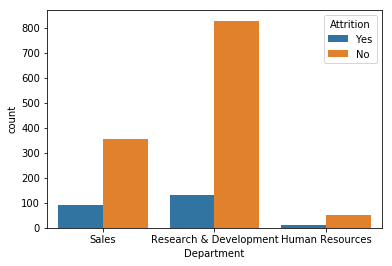

In [20]:
sns.countplot(ibm.Department,hue=ibm.Attrition)

dept=ibm.Department.unique()
dept

In [21]:
for i in dept:
    

    print('Percentage of attrition rate w.r.t Department {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['Department']==i)]['Department'].count()
     /
     ibm[ibm['Department']==i]['Department'].count()) * 100)

Percentage of attrition rate w.r.t Department Sales is  20.62780269058296
Percentage of attrition rate w.r.t Department Research & Development is  13.839750260145681
Percentage of attrition rate w.r.t Department Human Resources is  19.047619047619047


#### From the percentage ration attrition rate is more in sales than R&D and HR

In [22]:
ibm.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

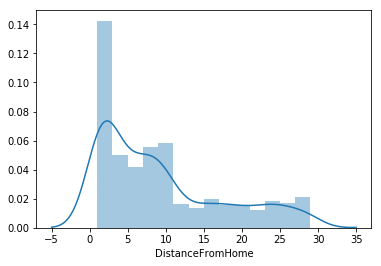

In [23]:
sns.distplot(ibm.DistanceFromHome)

#### from the plot above, the lowest distance from their home to workplace is 1 km and the farthest is 29kms.
#### 75% of the people are within 14 kms distance from the work place.
#### we have to find out the attrition rate of the remaining people and can tend to predict Attrition.

In [24]:
edu=ibm.Education.unique()
edu

array([2, 1, 4, 3, 5], dtype=int64)

In [25]:
for i in range(1,6):
    

    print('Percentage of attrition rate w.r.t Education level {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['Education']==i)]['Education'].count()
     /
     ibm[ibm['Education']==i]['Education'].count()) * 100)

Percentage of attrition rate w.r.t Education level 1 is  18.235294117647058
Percentage of attrition rate w.r.t Education level 2 is  15.602836879432624
Percentage of attrition rate w.r.t Education level 3 is  17.307692307692307
Percentage of attrition rate w.r.t Education level 4 is  14.572864321608039
Percentage of attrition rate w.r.t Education level 5 is  10.416666666666668


#### There are 5 education levels. and level 3 is having highest count of people.


In [26]:
edu_f=ibm.EducationField.unique()
edu_f

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [27]:
for i in edu_f:
    

    print('Percentage of attrition rate w.r.t Education Field - {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['EducationField']==i)]['EducationField'].count()
     /
     ibm[ibm['EducationField']==i]['EducationField'].count()) * 100)

Percentage of attrition rate w.r.t Education Field - Life Sciences is  14.686468646864686
Percentage of attrition rate w.r.t Education Field - Other is  13.414634146341465
Percentage of attrition rate w.r.t Education Field - Medical is  13.577586206896552
Percentage of attrition rate w.r.t Education Field - Marketing is  22.0125786163522
Percentage of attrition rate w.r.t Education Field - Technical Degree is  24.242424242424242
Percentage of attrition rate w.r.t Education Field - Human Resources is  25.925925925925924


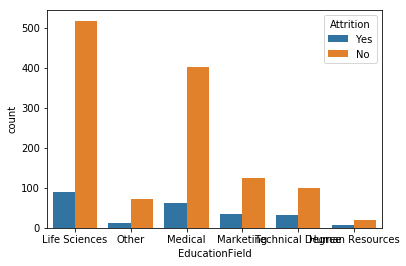

In [28]:
sns.countplot(ibm.EducationField,hue=ibm.Attrition)

#### There are 5 Education levels and the attrition rate is more in Life sciences field. There is minimum attrition in HR field

In [29]:
ibm.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [30]:
for i in range(1,5):
    

    print('Percentage of attrition rate w.r.t Environment Satisfaction level - {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['EnvironmentSatisfaction']==i)]['EnvironmentSatisfaction'].count()
     /
     ibm[ibm['EnvironmentSatisfaction']==i]['EnvironmentSatisfaction'].count()) * 100)

Percentage of attrition rate w.r.t Environment Satisfaction level - 1 is  25.352112676056336
Percentage of attrition rate w.r.t Environment Satisfaction level - 2 is  14.982578397212542
Percentage of attrition rate w.r.t Environment Satisfaction level - 3 is  13.686534216335541
Percentage of attrition rate w.r.t Environment Satisfaction level - 4 is  13.452914798206278


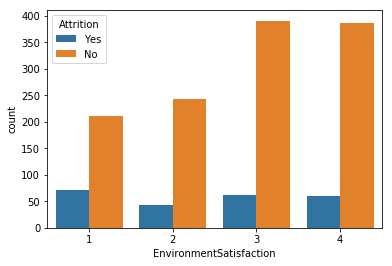

In [31]:
sns.countplot(ibm.EnvironmentSatisfaction,hue=ibm.Attrition)

#### There are 4 Environment satisfaction levels 1,2,3,4 1 being low and 4 being high. 
#### from the above countplot, we can see that number of employees are more in the 3 and 4 satisfation group and less in 1 and 2 groups
#### the attrition rate is more in satisfaction level 1.

In [32]:
ibm.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [33]:
for i in range(1,5):
    

    print('Percentage of attrition rate for Job Involvement level {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['JobInvolvement']==i)]['JobInvolvement'].count()
     /
     ibm[ibm['JobInvolvement']==i]['JobInvolvement'].count()) * 100)

Percentage of attrition rate for Job Involvement level 1 is  33.734939759036145
Percentage of attrition rate for Job Involvement level 2 is  18.933333333333334
Percentage of attrition rate for Job Involvement level 3 is  14.400921658986174
Percentage of attrition rate for Job Involvement level 4 is  9.027777777777777


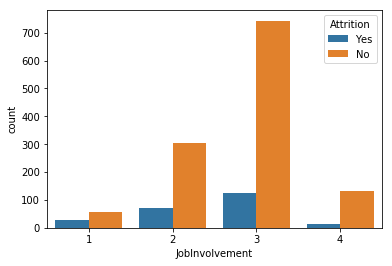

In [34]:
sns.countplot(ibm.JobInvolvement, hue=ibm.Attrition)

In [35]:
ibm.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

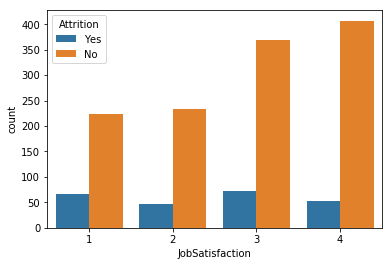

In [36]:
sns.countplot(ibm.JobSatisfaction,hue=ibm.Attrition)

In [37]:
ibm[ibm['Attrition']=='Yes']['JobSatisfaction'].value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [38]:
for i in range(1,5):
    

    print('Percentage of attrition rate for Job Satisfaction level {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['JobSatisfaction']==i)]['JobSatisfaction'].count()
     /
     ibm[ibm['JobSatisfaction']==i]['JobSatisfaction'].count()) * 100)

Percentage of attrition rate for Job Satisfaction level 1 is  22.837370242214533
Percentage of attrition rate for Job Satisfaction level 2 is  16.428571428571427
Percentage of attrition rate for Job Satisfaction level 3 is  16.515837104072396
Percentage of attrition rate for Job Satisfaction level 4 is  11.328976034858387


#### There are 4 job satisfaction levels 1,2,3,4 1 being low and 4 being high. Similar to environment satisfaction , employee count is more in levels 3 and 4 rather than 1 and 2
#### the attrition rate is more in level 1 than others

In [39]:
job_role=ibm.JobRole.unique()
job_role

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [40]:
for i in job_role:
    

    print('Percentage of attrition rate for Job role {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['JobRole']==i)]['JobRole'].count()
     /
     ibm[ibm['JobRole']==i]['JobRole'].count()) * 100)

Percentage of attrition rate for Job role Sales Executive is  17.484662576687114
Percentage of attrition rate for Job role Research Scientist is  16.095890410958905
Percentage of attrition rate for Job role Laboratory Technician is  23.93822393822394
Percentage of attrition rate for Job role Manufacturing Director is  6.896551724137931
Percentage of attrition rate for Job role Healthcare Representative is  6.870229007633588
Percentage of attrition rate for Job role Manager is  4.901960784313726
Percentage of attrition rate for Job role Sales Representative is  39.75903614457831
Percentage of attrition rate for Job role Research Director is  2.5
Percentage of attrition rate for Job role Human Resources is  23.076923076923077


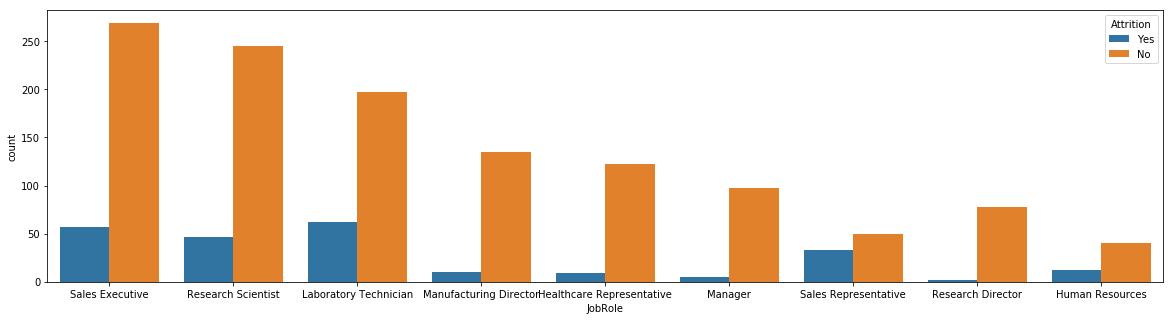

In [41]:
plt.figure(figsize= (20, 5))
sns.countplot(ibm.JobRole,hue=ibm.Attrition)

In [42]:
ibm.JobLevel.value_counts()


1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

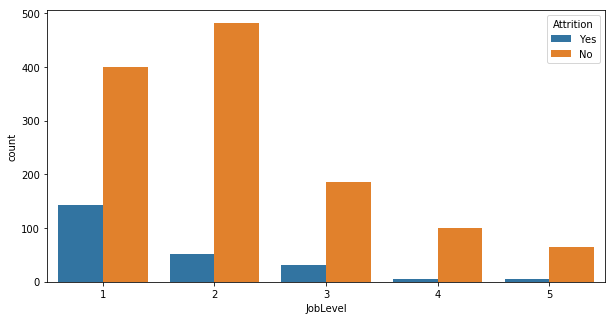

In [43]:
plt.figure(figsize= (10, 5))
sns.countplot(ibm.JobLevel,hue=ibm.Attrition)

In [44]:
for i in range(1,6):
    

    print('Percentage of attrition rate for Job Level {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['JobLevel']==i)]['JobLevel'].count()
     /
     ibm[ibm['JobLevel']==i]['JobLevel'].count()) * 100)

Percentage of attrition rate for Job Level 1 is  26.335174953959484
Percentage of attrition rate for Job Level 2 is  9.737827715355806
Percentage of attrition rate for Job Level 3 is  14.678899082568808
Percentage of attrition rate for Job Level 4 is  4.716981132075472
Percentage of attrition rate for Job Level 5 is  7.246376811594203


In [45]:
ibm.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

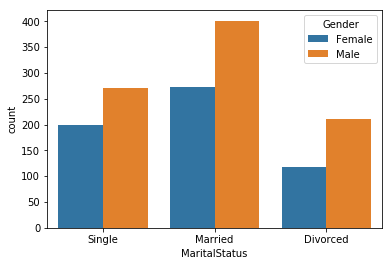

In [46]:
sns.countplot(ibm.MaritalStatus,hue=ibm.Gender)

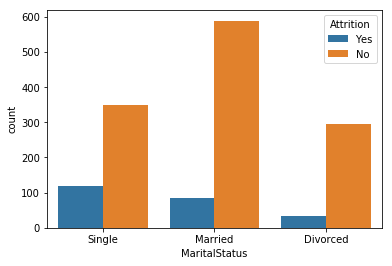

In [47]:
sns.countplot(ibm.MaritalStatus,hue=ibm.Attrition)
ms=ibm.MaritalStatus.unique()

In [48]:
for i in ms:
    

    print('Percentage of attrition rate w.r.t Marital Status {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['MaritalStatus']==i)]['MaritalStatus'].count()
     /
     ibm[ibm['MaritalStatus']==i]['MaritalStatus'].count()) * 100)

Percentage of attrition rate w.r.t Marital Status Single is  25.53191489361702
Percentage of attrition rate w.r.t Marital Status Married is  12.481426448736999
Percentage of attrition rate w.r.t Marital Status Divorced is  10.091743119266056


In [49]:
#### from the above, it is clear that unmarried people tend to move from IBM than married and divorced people.


In [50]:
ibm.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

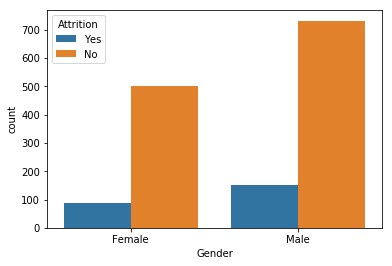

In [51]:
sns.countplot(ibm.Gender,hue=ibm.Attrition)
gs=ibm.Gender.unique()

In [52]:
for i in gs:
    

    print('Percentage of attrition rate w.r.t Gender- {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['Gender']==i)]['Gender'].count()
     /
     ibm[ibm['Gender']==i]['Gender'].count()) * 100)

Percentage of attrition rate w.r.t Gender- Female is  14.795918367346939
Percentage of attrition rate w.r.t Gender- Male is  17.006802721088434


In [53]:
ibm.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

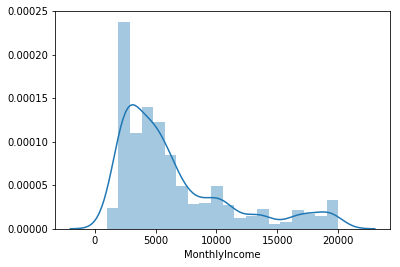

In [54]:
sns.distplot(ibm.MonthlyIncome)

In [55]:
print('Attrition rate of monthly Income below 5000 is ',(ibm[(ibm['MonthlyIncome']< 5000) 
                                                             & (ibm['Attrition']=='Yes')]['MonthlyIncome'].count() 
                                                         / ibm[(ibm['MonthlyIncome']< 5000)]['MonthlyIncome'].count()) * 100)

print('Attrition rate of monthly Income between 5000 and 10000 is ',(ibm[(ibm['MonthlyIncome']> 5000) 
                                                            & (ibm['MonthlyIncome']<10000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyIncome'].count() 
                                                         / ibm[(ibm['MonthlyIncome']> 5000) 
                                                            & (ibm['MonthlyIncome']<10000)]['MonthlyIncome'].count()) * 100)

print('Attrition rate of monthly Income between 10000 and 15000 is ',(ibm[(ibm['MonthlyIncome']> 10000) 
                                                            & (ibm['MonthlyIncome']<15000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyIncome'].count() 
                                                         / ibm[(ibm['MonthlyIncome']> 10000) 
                                                            & (ibm['MonthlyIncome']<15000)]['MonthlyIncome'].count()) * 100)

print('Attrition rate of monthly Income between 15000 and 20000 is ',(ibm[(ibm['MonthlyIncome']> 15000) 
                                                            & (ibm['MonthlyIncome']<20000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyIncome'].count() 
                                                         / ibm[(ibm['MonthlyIncome']> 15000) 
                                                            & (ibm['MonthlyIncome']<20000)]['MonthlyIncome'].count()) * 100)

print('Attrition rate of monthly Income above 20000 is ',(ibm[(ibm['MonthlyIncome']> 20000) 
                                                            
                                                             & (ibm['Attrition']=='Yes')]['MonthlyIncome'].count() 
                                                         / ibm[(ibm['MonthlyIncome']> 20000)]['MonthlyIncome'].count()) * 100)


Attrition rate of monthly Income below 5000 is  21.762349799732977
Attrition rate of monthly Income between 5000 and 10000 is  11.136363636363637
Attrition rate of monthly Income between 10000 and 15000 is  13.513513513513514
Attrition rate of monthly Income between 15000 and 20000 is  3.7593984962406015
Attrition rate of monthly Income above 20000 is  nan


In [56]:
ibm.MonthlyRate.describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

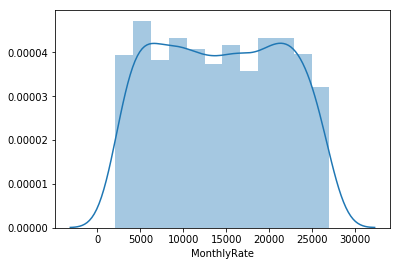

In [57]:
sns.distplot(ibm.MonthlyRate)

In [58]:
print('Attrition rate of Monthly rate below 5000 is ',(ibm[(ibm['MonthlyRate']< 5000) 
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']< 5000) ]['MonthlyRate'].count()) * 100)

print('Attrition rate of MonthlyRate between 5000 and 10000 is ',(ibm[(ibm['MonthlyRate']> 5000) 
                                                            & (ibm['MonthlyRate']<10000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']> 5000) 
                                                            & (ibm['MonthlyRate']<10000)]['MonthlyRate'].count()) * 100)

print('Attrition rate of MonthlyRate between 10000 and 15000 is ',(ibm[(ibm['MonthlyRate']> 10000) 
                                                            & (ibm['MonthlyRate']<15000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']> 10000) 
                                                            & (ibm['MonthlyRate']<15000)]['MonthlyRate'].count()) * 100)

print('Attrition rate of MonthlyRate between 15000 and 20000 is ',(ibm[(ibm['MonthlyRate']> 15000) 
                                                            & (ibm['MonthlyRate']<20000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']> 15000) 
                                                            & (ibm['MonthlyRate']<20000)]['MonthlyRate'].count()) * 100)

print('Attrition rate of MonthlyRate between 20000 and 25000 is ',(ibm[(ibm['MonthlyRate']> 20000) 
                                                             & (ibm['MonthlyRate']<25000)
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']> 20000) 
                                                             & (ibm['MonthlyRate']<25000)]['MonthlyRate'].count()) * 100)


print('Attrition rate of MonthlyRate above 25000 is ',(ibm[(ibm['MonthlyRate']> 25000) 
                                                             
                                                             & (ibm['Attrition']=='Yes')]['MonthlyRate'].count() 
                                                         / ibm[(ibm['MonthlyRate']> 25000)]['MonthlyRate'].count()) * 100)


Attrition rate of Monthly rate below 5000 is  17.543859649122805
Attrition rate of MonthlyRate between 5000 and 10000 is  13.291139240506327
Attrition rate of MonthlyRate between 10000 and 15000 is  18.53146853146853
Attrition rate of MonthlyRate between 15000 and 20000 is  14.76510067114094
Attrition rate of MonthlyRate between 20000 and 25000 is  15.894039735099339
Attrition rate of MonthlyRate above 25000 is  20.833333333333336


In [59]:
ibm.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

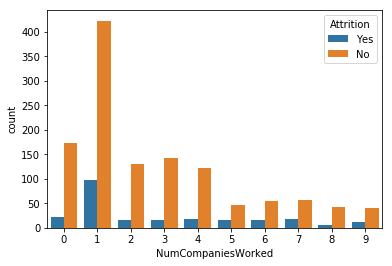

In [60]:
sns.countplot(ibm.NumCompaniesWorked,hue=ibm.Attrition)

In [61]:
for i in range(0,10):
    

    print('Percentage of attrition rate w.r.t Number of Companies worked of count {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['NumCompaniesWorked']==i)]['NumCompaniesWorked'].count()
     /
     ibm[ibm['NumCompaniesWorked']==i]['NumCompaniesWorked'].count()) * 100)

Percentage of attrition rate w.r.t Number of Companies worked of count 0 is  11.6751269035533
Percentage of attrition rate w.r.t Number of Companies worked of count 1 is  18.809980806142036
Percentage of attrition rate w.r.t Number of Companies worked of count 2 is  10.95890410958904
Percentage of attrition rate w.r.t Number of Companies worked of count 3 is  10.062893081761008
Percentage of attrition rate w.r.t Number of Companies worked of count 4 is  12.23021582733813
Percentage of attrition rate w.r.t Number of Companies worked of count 5 is  25.396825396825395
Percentage of attrition rate w.r.t Number of Companies worked of count 6 is  22.857142857142858
Percentage of attrition rate w.r.t Number of Companies worked of count 7 is  22.972972972972975
Percentage of attrition rate w.r.t Number of Companies worked of count 8 is  12.244897959183673
Percentage of attrition rate w.r.t Number of Companies worked of count 9 is  23.076923076923077


#### Attrition rate is more among the people who hav worked in more than 5 companies earlier

In [62]:
ibm.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [63]:
ibm.OverTime.describe()

count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object

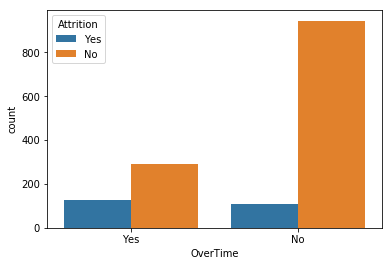

In [64]:
sns.countplot(ibm.OverTime,hue=ibm.Attrition)

In [65]:
print('Percentage of attrition rate w.r.t if they have done Overtime is ',(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['OverTime']=='Yes')]['NumCompaniesWorked'].count()
     /
     ibm['OverTime'].count()) * 100)

print('Percentage of attrition rate w.r.t if they have not done Overtime is ',(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['OverTime']=='No')]['NumCompaniesWorked'].count()
     /
     ibm['OverTime'].count()) * 100)


Percentage of attrition rate w.r.t if they have done Overtime is  8.639455782312925
Percentage of attrition rate w.r.t if they have not done Overtime is  7.482993197278912


#### Attriton rate is more if the employee has done over time

In [66]:
ibm.PercentSalaryHike.describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

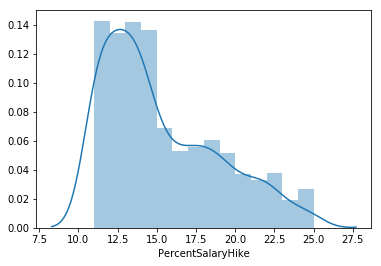

In [67]:
sns.distplot(ibm.PercentSalaryHike)

In [68]:
print('Attrition rate for Percentage Salary hike less than 10 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['PercentSalaryHike']< 10)]['PercentSalaryHike'].count()
     /
     ibm[ibm['PercentSalaryHike']< 10]['PercentSalaryHike'].count())*100)


print('Attrition rate for Percentage Salary hike between 10 % to 15 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['PercentSalaryHike']> 10)
          & (ibm['PercentSalaryHike']< 15)]['PercentSalaryHike'].count()
     /
     ibm['PercentSalaryHike'].count())*100)

print('Attrition rate for Percentage Salary hike between 15 % to 20 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['PercentSalaryHike']> 15)
          & (ibm['PercentSalaryHike']< 20)]['PercentSalaryHike'].count()
     /
     ibm[(ibm['PercentSalaryHike']> 10)
          & (ibm['PercentSalaryHike']< 15)]['PercentSalaryHike'].count())*100)


print('Attrition rate for Percentage Salary hike between 20 % to 25 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['PercentSalaryHike']> 20)
          & (ibm['PercentSalaryHike']< 25)]['PercentSalaryHike'].count()
     /
     ibm[(ibm['PercentSalaryHike']> 20)
          & (ibm['PercentSalaryHike']< 25)]['PercentSalaryHike'].count())*100)

print('Attrition rate for Percentage Salary hike above 25 % is ',
     (ibm[(ibm['Attrition']=='Yes') 
          & (ibm['PercentSalaryHike']> 25)]['PercentSalaryHike'].count()
     /
     ibm[(ibm['PercentSalaryHike']> 25)]['PercentSalaryHike'].count())*100)

Attrition rate for Percentage Salary hike less than 10 % is  nan
Attrition rate for Percentage Salary hike between 10 % to 15 % is  8.979591836734693
Attrition rate for Percentage Salary hike between 15 % to 20 % is  6.112469437652812
Attrition rate for Percentage Salary hike between 20 % to 25 % is  18.954248366013072
Attrition rate for Percentage Salary hike above 25 % is  nan


In [69]:
ibm.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

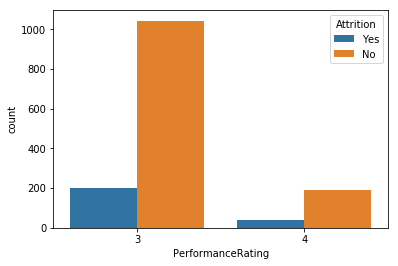

In [70]:
sns.countplot(ibm.PerformanceRating,hue=ibm.Attrition)

In [71]:
print('Unique Performance Ratings are',ibm.PerformanceRating.unique())
  
for i in range(3,5):
    

    print('Percentage of attrition rate w.r.t Performance Rating {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['PerformanceRating']==i)]['PerformanceRating'].count()
     /
     ibm[ibm['PerformanceRating']==i]['PerformanceRating'].count()) * 100)

Unique Performance Ratings are [3 4]
Percentage of attrition rate w.r.t Performance Rating 3 is  16.077170418006432
Percentage of attrition rate w.r.t Performance Rating 4 is  16.371681415929203


In [72]:
ibm.RelationshipSatisfaction.describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

In [73]:
ibm.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

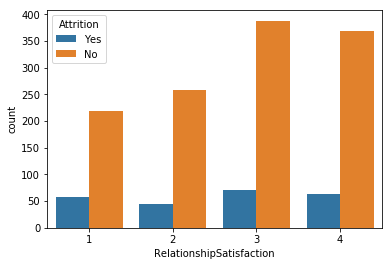

In [74]:
sns.countplot(ibm.RelationshipSatisfaction,hue=ibm.Attrition)

In [75]:
  
for i in range(1,5):
    

    print('Percentage of attrition rate w.r.t Relationship Satisfaction {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['RelationshipSatisfaction']==i)]['RelationshipSatisfaction'].count()
     /
     ibm[ibm['RelationshipSatisfaction']==i]['RelationshipSatisfaction'].count()) * 100)

Percentage of attrition rate w.r.t Relationship Satisfaction 1 is  20.652173913043477
Percentage of attrition rate w.r.t Relationship Satisfaction 2 is  14.85148514851485
Percentage of attrition rate w.r.t Relationship Satisfaction 3 is  15.468409586056644
Percentage of attrition rate w.r.t Relationship Satisfaction 4 is  14.814814814814813


#### Attrition rate is more if relationship satisfaction is less and is low if employes ahve highes relationship satisfaction

In [76]:
ibm.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

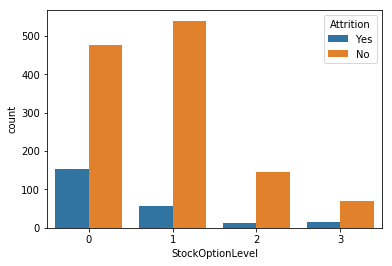

In [77]:
sns.countplot(ibm.StockOptionLevel,hue=ibm.Attrition)

In [78]:
  
for i in range(0,4):
    

    print('Percentage of attrition rate w.r.t Stock Option Level {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['StockOptionLevel']==i)]['StockOptionLevel'].count()
     /
     ibm[ibm['StockOptionLevel']==i]['StockOptionLevel'].count()) * 100)

Percentage of attrition rate w.r.t Stock Option Level 0 is  24.405705229793977
Percentage of attrition rate w.r.t Stock Option Level 1 is  9.395973154362416
Percentage of attrition rate w.r.t Stock Option Level 2 is  7.59493670886076
Percentage of attrition rate w.r.t Stock Option Level 3 is  17.647058823529413


#### Attrition rate is more when the stock option is very low as well as very high

In [79]:
ibm.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

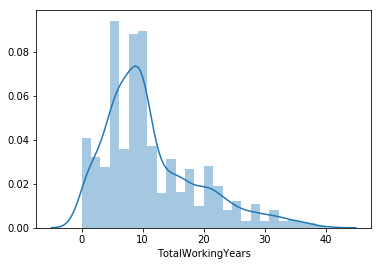

In [80]:
sns.distplot(ibm.TotalWorkingYears)

In [81]:
print('Attrition rate for Total Working Hours less than 10  is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['TotalWorkingYears']< 10)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['TotalWorkingYears']< 10)]['TotalWorkingYears'].count())*100)


print('Attrition rate for Percentage Salary hike between 10 % to 20 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['TotalWorkingYears']> 10)
          & (ibm['TotalWorkingYears']< 20)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['TotalWorkingYears']> 10)
          & (ibm['TotalWorkingYears']< 20)]['TotalWorkingYears'].count())*100)

print('Attrition rate for Percentage Salary hike between 20 % to 30 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['TotalWorkingYears']> 20)
          & (ibm['TotalWorkingYears']< 30)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['TotalWorkingYears']> 20)
          & (ibm['TotalWorkingYears']< 30)]['TotalWorkingYears'].count())*100)


print('Attrition rate for Percentage Salary hike between 30 % to 40 % is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['TotalWorkingYears']> 30)
          & (ibm['TotalWorkingYears']< 40)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['TotalWorkingYears']> 30)
          & (ibm['TotalWorkingYears']< 40)]['TotalWorkingYears'].count())*100)

print('Attrition rate for Percentage Salary hike above 40 % is ',
     (ibm[(ibm['Attrition']=='Yes') 
          & (ibm['TotalWorkingYears']> 40)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['TotalWorkingYears']> 40)]['TotalWorkingYears'].count())*100)

Attrition rate for Total Working Hours less than 10  is  21.7753120665742
Attrition rate for Percentage Salary hike between 10 % to 20 % is  11.935483870967742
Attrition rate for Percentage Salary hike between 20 % to 30 % is  7.142857142857142
Attrition rate for Percentage Salary hike between 30 % to 40 % is  6.8181818181818175
Attrition rate for Percentage Salary hike above 40 % is  nan


#### Attrition rate is more if the total working hours is less than 10 

In [82]:
ibm.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

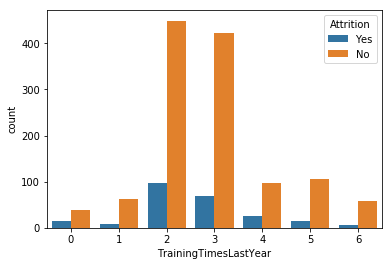

In [83]:
sns.countplot(ibm.TrainingTimesLastYear,hue=ibm.Attrition)

In [84]:
  
for i in range(0,7):
    

    print('Percentage of attrition rate w.r.t TrainingTimesLastYear of  {} months is '.format(i),(ibm[(ibm['Attrition']=='Yes') & 
         (ibm['TrainingTimesLastYear']==i)]['TrainingTimesLastYear'].count()
     /
     ibm[ibm['TrainingTimesLastYear']==i]['TrainingTimesLastYear'].count()) * 100)

Percentage of attrition rate w.r.t TrainingTimesLastYear of  0 months is  27.77777777777778
Percentage of attrition rate w.r.t TrainingTimesLastYear of  1 months is  12.676056338028168
Percentage of attrition rate w.r.t TrainingTimesLastYear of  2 months is  17.915904936014627
Percentage of attrition rate w.r.t TrainingTimesLastYear of  3 months is  14.052953156822811
Percentage of attrition rate w.r.t TrainingTimesLastYear of  4 months is  21.138211382113823
Percentage of attrition rate w.r.t TrainingTimesLastYear of  5 months is  11.76470588235294
Percentage of attrition rate w.r.t TrainingTimesLastYear of  6 months is  9.230769230769232


#### Attrition rate is more when there is no training period before working in projects

In [85]:
ibm.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

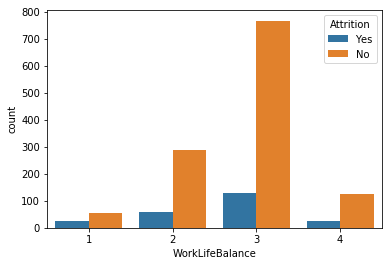

In [86]:
sns.countplot(ibm.WorkLifeBalance,hue=ibm.Attrition)

In [87]:
  
for i in range(1,5):
    

    print('Percentage of attrition rate w.r.t Work life balance of {} is '.format(i),(ibm[(ibm['Attrition']=='Yes') 
        &(ibm['WorkLifeBalance']==i)]['WorkLifeBalance'].count()
     /
     ibm[ibm['WorkLifeBalance']==i]['WorkLifeBalance'].count()) * 100)

Percentage of attrition rate w.r.t Work life balance of 1 is  31.25
Percentage of attrition rate w.r.t Work life balance of 2 is  16.86046511627907
Percentage of attrition rate w.r.t Work life balance of 3 is  14.221724524076148
Percentage of attrition rate w.r.t Work life balance of 4 is  17.647058823529413


#### Work life balance has for levels 1 being least and 4 being highest. 
#### If the Work life balance is least then people tend to move out. ie, attrition rate is more

In [88]:
ibm.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

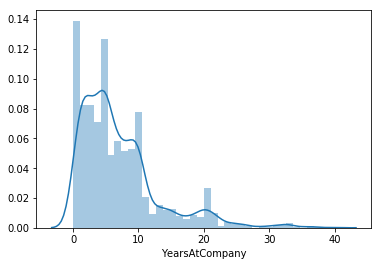

In [89]:
sns.distplot(ibm.YearsAtCompany)

In [90]:
print('Attrition rate for working years within less than 10 years in same company  is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsAtCompany']< 10)]['YearsAtCompany'].count()
     /
     ibm[(ibm['YearsAtCompany']< 10)]['YearsAtCompany'].count())*100)


print('Attrition rate for working years between 10 and 20 years in same company  is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsAtCompany']> 10)
          & (ibm['YearsAtCompany']< 20)]['YearsAtCompany'].count()
     /
     ibm[(ibm['YearsAtCompany']> 10)
          & (ibm['YearsAtCompany']< 20)]['YearsAtCompany'].count())*100)

print('Attrition rate for working years between  20 and 30 years in same company  is  ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsAtCompany']> 20)
          & (ibm['YearsAtCompany']< 30)]['TotalWorkingYears'].count()
     /
     ibm[(ibm['YearsAtCompany']> 20)
          & (ibm['YearsAtCompany']< 30)]['YearsAtCompany'].count())*100)


print('Attrition rate for working years between 30  and 40 years in same company  is  ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsAtCompany']> 30)
          & (ibm['YearsAtCompany']< 40)]['YearsAtCompany'].count()
     /
     ibm[(ibm['YearsAtCompany']> 30)
          & (ibm['YearsAtCompany']< 40)]['YearsAtCompany'].count())*100)

print('Attrition rate for working years within greater than 40 years in same company  is ',
     (ibm[(ibm['Attrition']=='Yes') 
          & (ibm['YearsAtCompany']> 40)]['YearsAtCompany'].count()
     /
     ibm[(ibm['YearsAtCompany']> 40)]['YearsAtCompany'].count())*100)

Attrition rate for working years within less than 10 years in same company  is  18.02536231884058
Attrition rate for working years between 10 and 20 years in same company  is  7.18954248366013
Attrition rate for working years between  20 and 30 years in same company  is   8.16326530612245
Attrition rate for working years between 30  and 40 years in same company  is   20.0
Attrition rate for working years within greater than 40 years in same company  is  nan


In [91]:
ibm.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

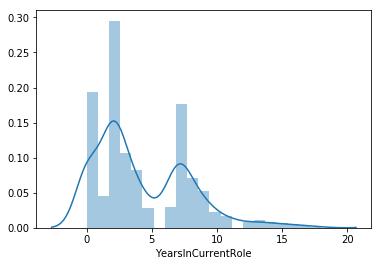

In [92]:
sns.distplot(ibm.YearsInCurrentRole)

In [93]:
print('Attrition rate for working in current for less than 5 years  is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsInCurrentRole']< 5)]['YearsInCurrentRole'].count()
     /
     ibm[(ibm['YearsInCurrentRole']< 5)]['YearsInCurrentRole'].count())*100)


print('Attrition rate for working in current role between 5 to 10 years in same company  is ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsInCurrentRole']> 5)
          & (ibm['YearsInCurrentRole']< 10)]['YearsInCurrentRole'].count()
     /
     ibm[(ibm['YearsInCurrentRole']> 5)
          & (ibm['YearsInCurrentRole']< 10)]['YearsInCurrentRole'].count())*100)

print('Attrition rate for working in current role between  10 and 15 years in same company  is  ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsInCurrentRole']> 10)
          & (ibm['YearsInCurrentRole']< 15)]['YearsInCurrentRole'].count()
     /
     ibm[(ibm['YearsInCurrentRole']> 10)
          & (ibm['YearsInCurrentRole']< 15)]['YearsInCurrentRole'].count())*100)


print('Attrition rate for working in current role between 15  and 20 years in same company  is  ',
     (ibm[(ibm['Attrition']=='Yes') & (ibm['YearsInCurrentRole']> 15)
          & (ibm['YearsInCurrentRole']< 20)]['YearsInCurrentRole'].count()
     /
     ibm[(ibm['YearsInCurrentRole']> 15)
          & (ibm['YearsInCurrentRole']< 20)]['YearsInCurrentRole'].count())*100)

print('Attrition rate for working in current role greater than 20 years in same company  is ',
     (ibm[(ibm['Attrition']=='Yes') 
          & (ibm['YearsInCurrentRole']> 20)]['YearsInCurrentRole'].count()
     /
     ibm[(ibm['YearsInCurrentRole']> 20)]['YearsInCurrentRole'].count())*100)

Attrition rate for working in current for less than 5 years  is  20.065789473684212
Attrition rate for working in current role between 5 to 10 years in same company  is  11.08433734939759
Attrition rate for working in current role between  10 and 15 years in same company  is   5.263157894736842
Attrition rate for working in current role between 15  and 20 years in same company  is   0.0
Attrition rate for working in current role greater than 20 years in same company  is  nan


In [94]:
ibm.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

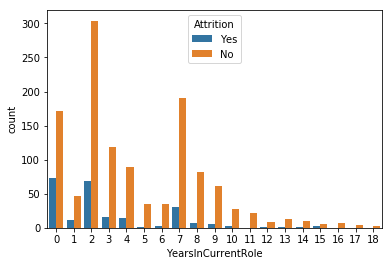

In [95]:
sns.countplot(ibm.YearsInCurrentRole,hue=ibm.Attrition)

In [96]:
  
for i in range(0,19):
    

    print('Percentage of attrition rate for working in current role for {} years  is '.format(i),(ibm[(ibm['Attrition']=='Yes') 
        &(ibm['YearsInCurrentRole']==i)]['YearsInCurrentRole'].count()
     /
     ibm[ibm['YearsInCurrentRole']==i]['YearsInCurrentRole'].count()) * 100)

Percentage of attrition rate for working in current role for 0 years  is  29.918032786885245
Percentage of attrition rate for working in current role for 1 years  is  19.298245614035086
Percentage of attrition rate for working in current role for 2 years  is  18.27956989247312
Percentage of attrition rate for working in current role for 3 years  is  11.851851851851853
Percentage of attrition rate for working in current role for 4 years  is  14.423076923076922
Percentage of attrition rate for working in current role for 5 years  is  2.7777777777777777
Percentage of attrition rate for working in current role for 6 years  is  5.405405405405405
Percentage of attrition rate for working in current role for 7 years  is  13.963963963963963
Percentage of attrition rate for working in current role for 8 years  is  7.865168539325842
Percentage of attrition rate for working in current role for 9 years  is  8.955223880597014
Percentage of attrition rate for working in current role for 10 years  is 

#### If the employee is in the same role for 5 and less years, he tends to move out of the company. i.e, the attrition rate is more
#### we need to check about the level of role within 5 years and more than 20 years.
#### if the role is less then they tend to move within 5 years else employee in high position naturally has high working years and wont move out of the company

##### If we see the count of years, we can clearly see that within 2 years the attrition rate is more if they are in smae role


In [97]:
ibm.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

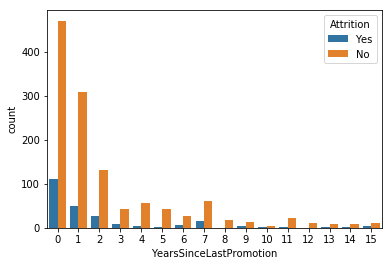

In [98]:
sns.countplot(ibm.YearsSinceLastPromotion,hue=ibm.Attrition)

In [99]:
  
for i in range(0,16):
    

    print('Percentage of attrition rate for {} years since last promotion  is '.format(i),(ibm[(ibm['Attrition']=='Yes') 
        &(ibm['YearsSinceLastPromotion']==i)]['YearsSinceLastPromotion'].count()
     /
     ibm[ibm['YearsSinceLastPromotion']==i]['YearsSinceLastPromotion'].count()) * 100)

Percentage of attrition rate for 0 years since last promotion  is  18.9328743545611
Percentage of attrition rate for 1 years since last promotion  is  13.725490196078432
Percentage of attrition rate for 2 years since last promotion  is  16.9811320754717
Percentage of attrition rate for 3 years since last promotion  is  17.307692307692307
Percentage of attrition rate for 4 years since last promotion  is  8.19672131147541
Percentage of attrition rate for 5 years since last promotion  is  4.444444444444445
Percentage of attrition rate for 6 years since last promotion  is  18.75
Percentage of attrition rate for 7 years since last promotion  is  21.052631578947366
Percentage of attrition rate for 8 years since last promotion  is  0.0
Percentage of attrition rate for 9 years since last promotion  is  23.52941176470588
Percentage of attrition rate for 10 years since last promotion  is  16.666666666666664
Percentage of attrition rate for 11 years since last promotion  is  8.333333333333332
Per

In [100]:
ibm.YearsWithCurrManager.value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

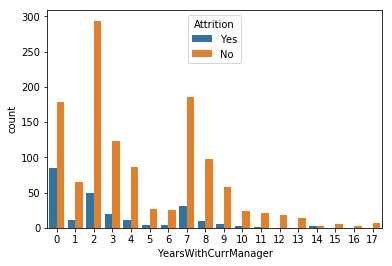

In [101]:
sns.countplot(ibm.YearsWithCurrManager,hue=ibm.Attrition)

In [102]:
  
for i in range(0,18):
    

    print('Percentage of attrition rate for {} years with same manager  is '.format(i),(ibm[(ibm['Attrition']=='Yes') 
        &(ibm['YearsWithCurrManager']==i)]['YearsWithCurrManager'].count()
     /
     ibm[ibm['YearsWithCurrManager']==i]['YearsWithCurrManager'].count()) * 100)

Percentage of attrition rate for 0 years with same manager  is  32.31939163498099
Percentage of attrition rate for 1 years with same manager  is  14.473684210526317
Percentage of attrition rate for 2 years with same manager  is  14.534883720930234
Percentage of attrition rate for 3 years with same manager  is  13.380281690140844
Percentage of attrition rate for 4 years with same manager  is  11.224489795918368
Percentage of attrition rate for 5 years with same manager  is  12.903225806451612
Percentage of attrition rate for 6 years with same manager  is  13.793103448275861
Percentage of attrition rate for 7 years with same manager  is  14.351851851851851
Percentage of attrition rate for 8 years with same manager  is  9.345794392523365
Percentage of attrition rate for 9 years with same manager  is  9.375
Percentage of attrition rate for 10 years with same manager  is  11.11111111111111
Percentage of attrition rate for 11 years with same manager  is  4.545454545454546
Percentage of attri

#### since StandardHours is same for all the records, we can drop that column

In [103]:
ibm.drop('StandardHours',axis=1,inplace=True)

In [104]:
ibm.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

#### since EmployeeCount is irrelevant to the data set, we can drop that column as well

In [105]:
ibm.drop('EmployeeCount',axis=1,inplace=True)

In [106]:
ibm.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

##### Since the Over18 feature has all same values ('Y'), We can drop this feature as it does not contribute to the dependant variable.

In [107]:
ibm.drop('Over18',axis=1,inplace=True)

In [108]:
ibm.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


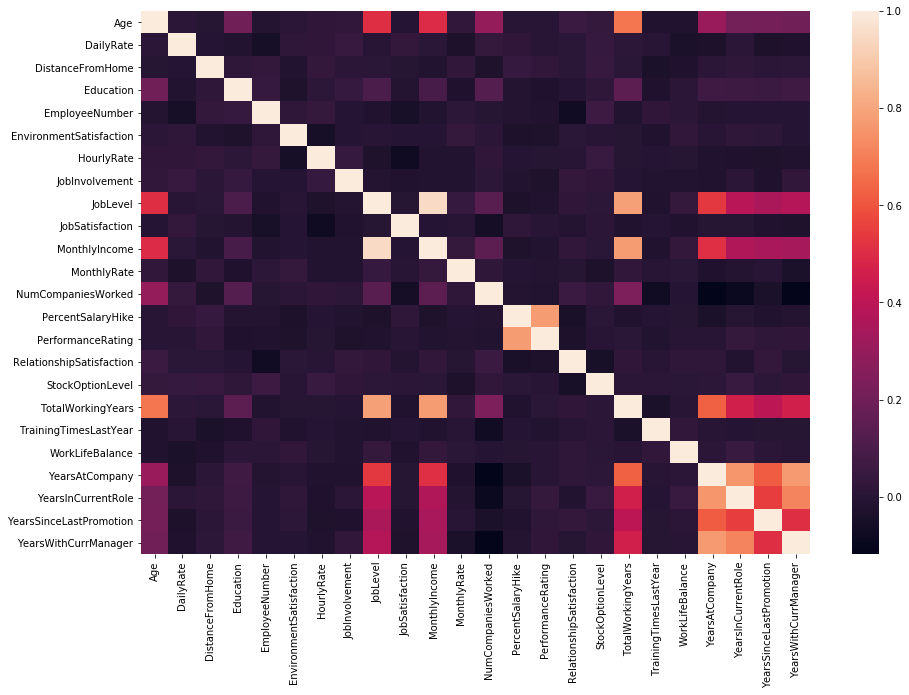

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(ibm.corr())

In [110]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

##### We are trying to change all the categorical values into Numerical Values.

##### Attrition

In [111]:

def Attr(x):
    if( x == 'Yes'):
        return 1
    else:
        return 0


ibm['Attrition']=ibm['Attrition'].apply(Attr)

ibm.Attrition.head(2)

0    1
1    0
Name: Attrition, dtype: int64

##### Business Travel

In [112]:
ibm.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [113]:
def BussTra(x):
    if ( x == 'Non-Travel'):
        return 1
    elif( x == 'Travel_Rarely'):
        return 2
    else :
        return 3
ibm['BusinessTravel']=ibm['BusinessTravel'].apply(BussTra)
ibm.BusinessTravel.unique()

#BussTra('Travel_Frequently')

array([2, 3, 1], dtype=int64)

##### Department

In [114]:
ibm.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [115]:
def Dept(x):
    if (x == 'Sales'):
        return 1
    elif ( x == 'Research & Development'):
        return 2
    else :
        return 3
ibm['Department']=ibm['Department'].apply(Dept)
ibm.Department.unique()

array([1, 2, 3], dtype=int64)

##### EducationField

In [116]:
ibm.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [117]:
def EduFld(x):
    if ( x == 'Human Resources'):
        return 1
    elif(x=='Life Sciences'):
        return 2
    elif(x=='Medical'):
        return 3
    elif(x=='Marketing'):
        return 4
    elif (x=='Technical Degree'):
        return 5
    else:
        return 6
ibm['EducationField']=ibm['EducationField'].apply(EduFld)
ibm.EducationField.value_counts()      

2    606
3    464
4    159
5    132
6     82
1     27
Name: EducationField, dtype: int64

##### Gender

In [118]:
ibm.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [119]:
def Gen(x):
    if (x== 'Male'):
        return 1
    else:
        return 2
ibm['Gender']=ibm['Gender'].apply(Gen)
ibm.Gender.value_counts()

1    882
2    588
Name: Gender, dtype: int64

##### JobRole

In [120]:
ibm.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [121]:
def jobRole(x):
    if ( x == 'Sales Executive'):
        return 1
    elif(x=='Research Scientist'):
        return 2
    elif (x=='Laboratory Technician'):
        return 3
    elif (x =='Manufacturing Director'):
        return 4
    elif(x == 'Healthcare Representative'):
        return 5
    elif (x =='Manager'):
        return 6
    elif( x == 'Sales Representative'):
        return 7
    elif ( x == 'Research Director'):
        return 8
    else:
        return 9
ibm['JobRole']=ibm['JobRole'].apply(jobRole)
ibm.JobRole.value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

##### MaritalStatus

In [122]:
ibm['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [123]:
def mrg(x):
    if (x == 'Married'):
        return 2
    elif ( x == 'Single'):
        return 1
    else:
        return 3

ibm['MaritalStatus']=ibm['MaritalStatus'].apply(mrg)
ibm['MaritalStatus'].value_counts()

2    673
1    470
3    327
Name: MaritalStatus, dtype: int64

##### OverTime

In [124]:
ibm.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

#### Since Attrition and Overtime has same categories (yes and no), we are reusing the same function

In [125]:
ibm['OverTime']=ibm['OverTime'].apply(Attr)
ibm.OverTime.value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

### We have converted all the categorical values into Numerical values

### Before Feature selection

In [126]:
ibm_feature2=ibm.copy()
ibm_constant1 = add_constant(ibm_feature2)
ibm_constant1.head()

,const,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,41,1,2,1102,1,1,2,2,1,...,3,1,0,8,0,1,6,4,0,5
1,1.0,49,0,3,279,2,8,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1.0,37,1,2,1373,2,2,2,6,4,...,3,2,0,7,3,3,0,0,0,0
3,1.0,33,0,3,1392,2,3,4,2,5,...,3,3,0,8,3,3,8,7,3,0
4,1.0,27,0,2,591,2,2,1,3,7,...,3,4,1,6,3,3,2,2,2,2


### Logistic Regression

In [127]:
x=ibm_constant1.drop('Attrition',axis=1)
y=ibm_constant1['Attrition'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred1=logreg.predict(x_train)

In [128]:
import sklearn
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on test set is ' ,accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on train set is ' ,accuracy_score(y_train,y_pred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nF1 score using logistic regression without any imbalance data correction technique',f1_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nRecall score using Logistic Regression without any imbalance data correction technique',recall_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nClassification report using logistic regression without any imbalance data correction technique\n',classification_report(y_test, y_pred))


Accuracy of the model using Logistic Regression without any imbalance data correction technique on test set is  0.8707482993197279
-----------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Logistic Regression without any imbalance data correction technique on train set is  0.8767006802721088
-----------------------------------------------------------------------------------------------------------------------------

F1 score using logistic regression without any imbalance data correction technique 0.42424242424242414
-----------------------------------------------------------------------------------------------------------------------------

Recall score using Logistic Regression without any imbalance data correction technique 0.2857142857142857
-----------------------------------------------------------------------------------------------------------------------------

Classification repo

#### Confusion Matrix

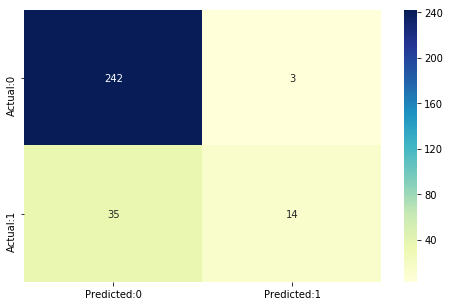

In [129]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  14<font>

**<font color=DarkBlue>True Negatives:**  242<font>

**<font color=DarkBlue>False Positives:** 3 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 35 ( *Type II error*)<font>

In [130]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [131]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8707482993197279 

 The Miss-classification = 1-Accuracy =  0.12925170068027214 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.2857142857142857 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9877551020408163 

 Positive Predictive value = TP / (TP+FP) =  0.8235294117647058 

 Negative predictive Value = TN / (TN+FN) =  0.8736462093862816 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  23.333333333333265 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.7231404958677686


### Decision Tree

In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

#### Gini Criterion

In [133]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)
giniPred = giniDecisionTree.predict(x_test)
giniPred1 = giniDecisionTree.predict(x_train)
print('Accuracy Score using Decision Tree - gini on train set: ',accuracy_score(y_train, giniPred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Decision Tree - gini on test set: ',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')

print('F1 score using Decision Tree - Gini without any technique',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - Gini without any technique',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Classification Report for Decision tree - gini')
print(classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini on train set:  0.8596938775510204
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score using Decision Tree - gini on test set:  0.8469387755102041
-----------------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - Gini without any technique 0.23728813559322035
-----------------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - Gini without any technique 0.14285714285714285
-----------------------------------------------------------------------------------------------------------------------------
Classification Report for Decision tree - gini
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      

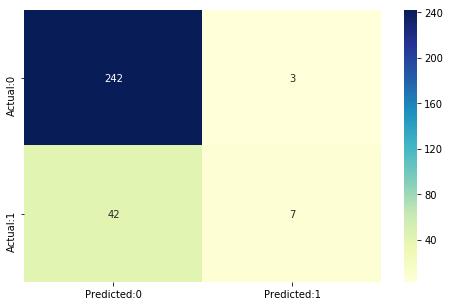

In [134]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [135]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(x_train, y_train)
entropyPred = entropyDecisionTree.predict(x_test)
entropyPred1 = entropyDecisionTree.predict(x_train)
print('Accuracy Score using Decision tree - entropy on train set: ',accuracy_score(y_train, entropyPred1))
print('---------------------------------------------------------------------------------------------------------------')
print('\nAccuracy Score using Decision tree - entropy on test set : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')

print('\nF1 score using Decision tree - Entropy without any technique',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('\nRecall score using  Decision tree - Entropy without any technique',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - Entropy without any technique\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy on train set:  0.8596938775510204
---------------------------------------------------------------------------------------------------------------

Accuracy Score using Decision tree - entropy on test set :  0.8469387755102041
---------------------------------------------------------------------------------------------------------------

F1 score using Decision tree - Entropy without any technique 0.23728813559322035
---------------------------------------------------------------------------------------------------------------

Recall score using  Decision tree - Entropy without any technique 0.14285714285714285
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - Entropy without any technique
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0

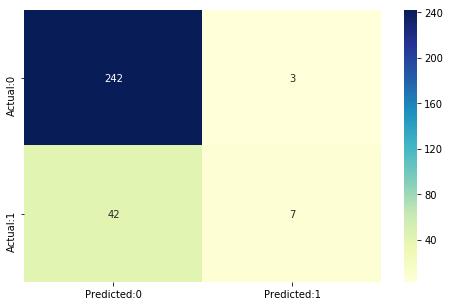

In [136]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Random Forest

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [138]:
fit_rf = RandomForestClassifier(random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

predictionforest = trainedforest.predict(x_test)
predictionforest1 = trainedforest.predict(x_train)
print(confusion_matrix(y_train,predictionforest1))
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(classification_report(y_train,predictionforest1))

[[988   0]
 [  0 188]]
[[245   0]
 [ 40   9]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       1.00      0.18      0.31        49

   micro avg       0.86      0.86      0.86       294
   macro avg       0.93      0.59      0.62       294
weighted avg       0.88      0.86      0.82       294

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

   micro avg       1.00      1.00      1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



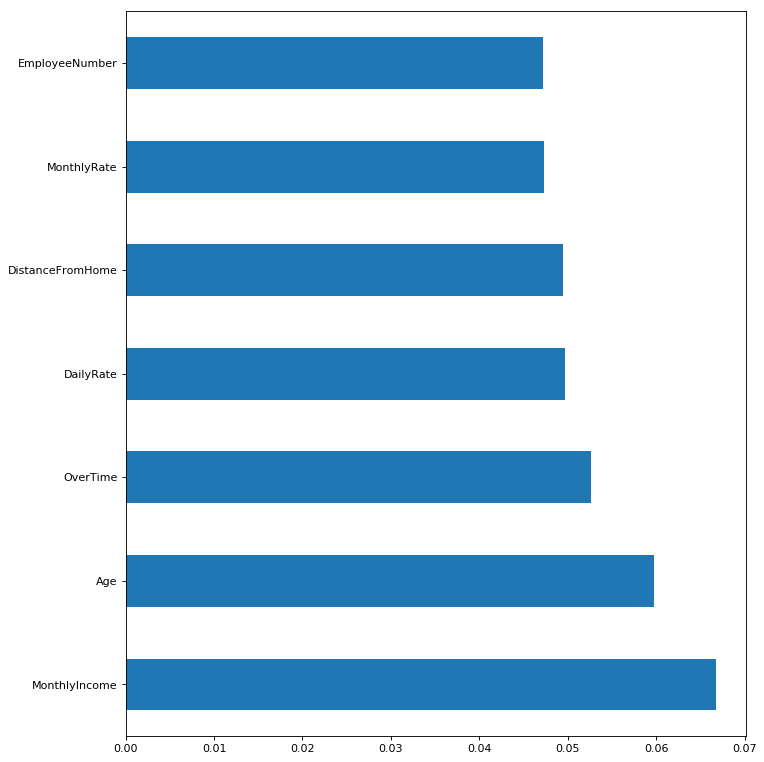

In [140]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= x.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [141]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto'}
Time taken in grid search:  21.08


In [142]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set without any techniques : {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set without any techniques : 1.00
Accuracy on test set: 0.83


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Correlation Method:

In [143]:
ibm2=ibm.copy()
c=ibm2.corr()
c['Attrition']

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.127006
DailyRate                  -0.056652
Department                 -0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.042248
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                     -0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                    -0.027930
JobSatisfaction            -0.103481
MaritalStatus              -0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
W

In [144]:
ibm_corr=ibm2[['Age', 'BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction','MaritalStatus', 'MonthlyIncome','OverTime','StockOptionLevel','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]
ibm_constant=sm.add_constant(ibm_corr)

### Logistic Regression

In [145]:
x=ibm_constant
y=ibm2['Attrition'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred1=logreg.predict(x_train)

In [146]:
import sklearn
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on test set is ' ,accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on train set is ' ,accuracy_score(y_train,y_pred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nF1 score using logistic regression without any imbalance data correction technique',f1_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nRecall score using Logistic Regression without any imbalance data correction technique',recall_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nClassification report using logistic regression without any imbalance data correction technique\n',classification_report(y_test, y_pred))


Accuracy of the model using Logistic Regression without any imbalance data correction technique on test set is  0.8503401360544217
-----------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Logistic Regression without any imbalance data correction technique on train set is  0.8605442176870748
-----------------------------------------------------------------------------------------------------------------------------

F1 score using logistic regression without any imbalance data correction technique 0.37142857142857144
-----------------------------------------------------------------------------------------------------------------------------

Recall score using Logistic Regression without any imbalance data correction technique 0.2653061224489796
-----------------------------------------------------------------------------------------------------------------------------

Classification repo

#### Confusion Matrix

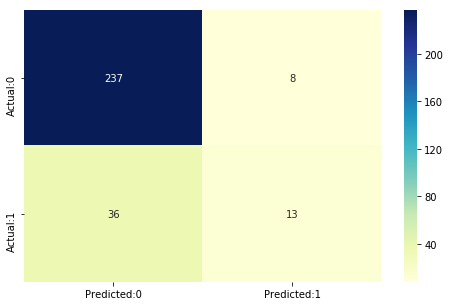

In [147]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  13<font>

**<font color=DarkBlue>True Negatives:**  237<font>

**<font color=DarkBlue>False Positives:** 8 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 36 ( *Type II error*)<font>

In [148]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [149]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8503401360544217 

 The Miss-classification = 1-Accuracy =  0.1496598639455783 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.2653061224489796 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9673469387755103 

 Positive Predictive value = TP / (TP+FP) =  0.6190476190476191 

 Negative predictive Value = TN / (TN+FN) =  0.8681318681318682 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  8.125000000000014 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.7594936708860758


### Decision Tree

In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

#### Gini Criterion

In [151]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)
giniPred = giniDecisionTree.predict(x_test)
giniPred1 = giniDecisionTree.predict(x_train)
print('Accuracy Score using Decision Tree - gini on train set: ',accuracy_score(y_train, giniPred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Decision Tree - gini on test set: ',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')

print('F1 score using Decision Tree - Gini without any technique',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - Gini without any technique',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Classification Report for Decision tree - gini')
print(classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini on train set:  0.8554421768707483
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score using Decision Tree - gini on test set:  0.8469387755102041
-----------------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - Gini without any technique 0.23728813559322035
-----------------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - Gini without any technique 0.14285714285714285
-----------------------------------------------------------------------------------------------------------------------------
Classification Report for Decision tree - gini
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      

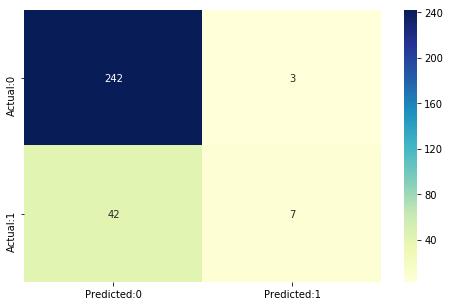

In [152]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [153]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(x_train, y_train)
entropyPred = entropyDecisionTree.predict(x_test)
entropyPred1 = entropyDecisionTree.predict(x_train)
print('Accuracy Score using Decision tree - entropy on train set: ',accuracy_score(y_train, entropyPred1))
print('---------------------------------------------------------------------------------------------------------------')
print('\nAccuracy Score using Decision tree - entropy on test set : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')

print('\nF1 score using Decision tree - Entropy without any technique',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('\nRecall score using  Decision tree - Entropy without any technique',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - Entropy without any technique\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy on train set:  0.8554421768707483
---------------------------------------------------------------------------------------------------------------

Accuracy Score using Decision tree - entropy on test set :  0.8469387755102041
---------------------------------------------------------------------------------------------------------------

F1 score using Decision tree - Entropy without any technique 0.23728813559322035
---------------------------------------------------------------------------------------------------------------

Recall score using  Decision tree - Entropy without any technique 0.14285714285714285
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - Entropy without any technique
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0

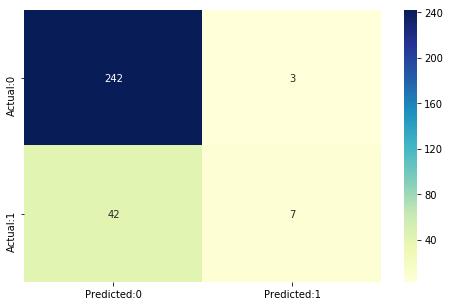

In [154]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Random Forest

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [156]:
fit_rf = RandomForestClassifier(random_state=42)

In [157]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

predictionforest = trainedforest.predict(x_test)
predictionforest1 = trainedforest.predict(x_train)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(classification_report(y_train,predictionforest1))

[[238   7]
 [ 34  15]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.68      0.31      0.42        49

   micro avg       0.86      0.86      0.86       294
   macro avg       0.78      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

   micro avg       1.00      1.00      1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



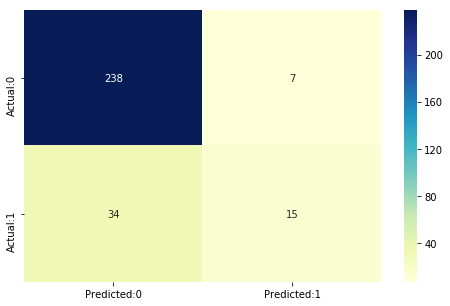

In [158]:
cm=confusion_matrix(y_test,predictionforest)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

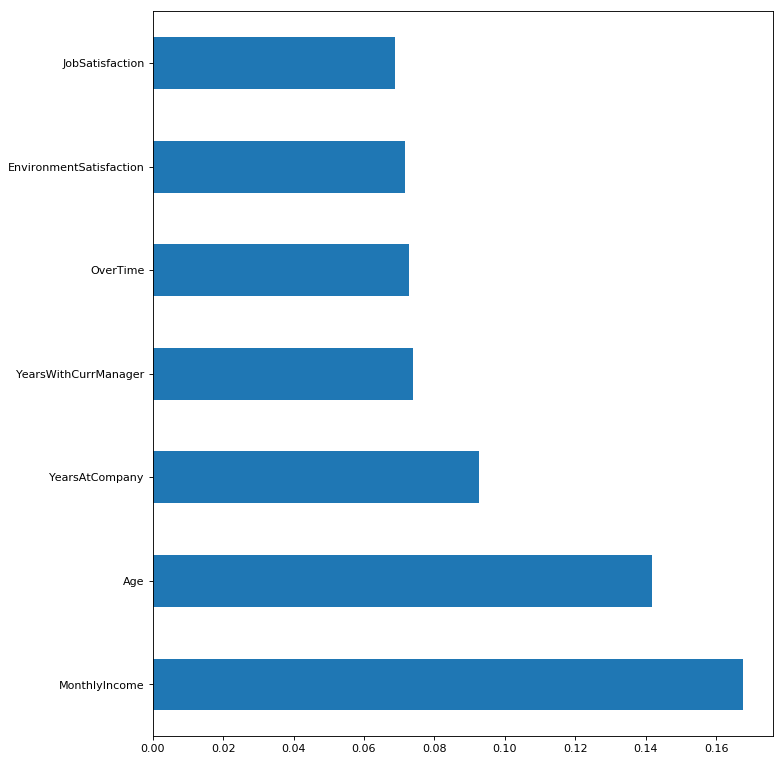

In [159]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= x.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [160]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto'}
Time taken in grid search:  11.31


### SVC

In [161]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set without any techniques : {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set without any techniques : 1.00
Accuracy on test set: 0.83


## K-Best Method

In [162]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(ibm.drop('Attrition',axis=1))
Y=ibm.Attrition.values
X_new = SelectKBest(chi2, k=2).fit_transform(Scaled_X, Y)



### Logistic Regression

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=.20,random_state=5)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred1=logreg.predict(x_train)

In [164]:
import sklearn
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on test set is ' ,accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on train set is ' ,accuracy_score(y_train,y_pred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nF1 score using logistic regression without any imbalance data correction technique',f1_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nRecall score using Logistic Regression without any imbalance data correction technique',recall_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nClassification report using logistic regression without any imbalance data correction technique\n',classification_report(y_test, y_pred))


Accuracy of the model using Logistic Regression without any imbalance data correction technique on test set is  0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Logistic Regression without any imbalance data correction technique on train set is  0.8401360544217688
-----------------------------------------------------------------------------------------------------------------------------

F1 score using logistic regression without any imbalance data correction technique 0.0
-----------------------------------------------------------------------------------------------------------------------------

Recall score using Logistic Regression without any imbalance data correction technique 0.0
-----------------------------------------------------------------------------------------------------------------------------

Classification report using logistic regression wi

#### Confusion Matrix

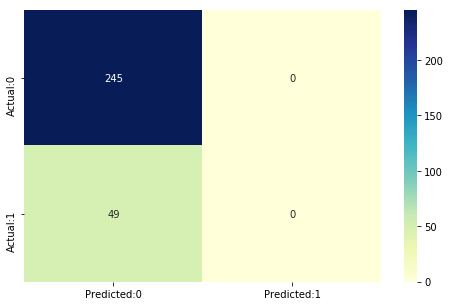

In [165]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  0<font>

**<font color=DarkBlue>True Negatives:**  245<font>

**<font color=DarkBlue>False Positives:** 0 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 49 ( *Type II error*)<font>

In [166]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [167]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8333333333333334 

 The Miss-classification = 1-Accuracy =  0.16666666666666663 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.0 

 Specificity or True Negative Rate = TN / (TN+FP) =  1.0 

 Positive Predictive value = TP / (TP+FP) =  nan 

 Negative predictive Value = TN / (TN+FN) =  0.8333333333333334 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  nan 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  1.0


### Decision Tree

In [168]:




import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

#### Gini Criterion

In [169]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)
giniPred = giniDecisionTree.predict(x_test)
giniPred1 = giniDecisionTree.predict(x_train)
print('Accuracy Score using Decision Tree - gini on train set: ',accuracy_score(y_train, giniPred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Decision Tree - gini on test set: ',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')

print('F1 score using Decision Tree - Gini without any technique',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - Gini without any technique',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Classification Report for Decision tree - gini')
print(classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini on train set:  0.8401360544217688
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score using Decision Tree - gini on test set:  0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - Gini without any technique 0.0
-----------------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - Gini without any technique 0.0
-----------------------------------------------------------------------------------------------------------------------------
Classification Report for Decision tree - gini
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

   mic

### Entropy Criterion

In [170]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(x_train, y_train)
entropyPred = entropyDecisionTree.predict(x_test)
entropyPred1 = entropyDecisionTree.predict(x_train)
print('Accuracy Score using Decision tree - entropy on train set: ',accuracy_score(y_train, entropyPred1))
print('---------------------------------------------------------------------------------------------------------------')
print('\nAccuracy Score using Decision tree - entropy on test set : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')

print('\nF1 score using Decision tree - Entropy without any technique',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('\nRecall score using  Decision tree - Entropy without any technique',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - Entropy without any technique\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy on train set:  0.8401360544217688
---------------------------------------------------------------------------------------------------------------

Accuracy Score using Decision tree - entropy on test set :  0.8333333333333334
---------------------------------------------------------------------------------------------------------------

F1 score using Decision tree - Entropy without any technique 0.0
---------------------------------------------------------------------------------------------------------------

Recall score using  Decision tree - Entropy without any technique 0.0
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - Entropy without any technique
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

   micro avg     

### Random Forest

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [172]:
fit_rf = RandomForestClassifier(random_state=42)

In [173]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, 
                                                        random_state = 101)

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)

predictionforest = trainedforest.predict(X_Test3)
predictionforest1 = trainedforest.predict(X_Train3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))
print(classification_report(Y_Train3,predictionforest1))

[[348  23]
 [ 47  23]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       371
           1       0.50      0.33      0.40        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.69      0.63      0.65       441
weighted avg       0.82      0.84      0.83       441

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       862
           1       0.54      0.35      0.43       167

   micro avg       0.85      0.85      0.85      1029
   macro avg       0.71      0.65      0.67      1029
weighted avg       0.83      0.85      0.83      1029



In [174]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search:  4.92


### SVC

In [175]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set without any techniques : {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set without any techniques : 0.84
Accuracy on test set: 0.83


## Lasso Regression

In [176]:
from sklearn.linear_model import LassoCV
X=ibm.drop('Attrition',axis=1)
Y=ibm.Attrition.values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
regr = LassoCV(cv=7, random_state=101)
regr.fit(x_train,y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(x_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))
model_coef[model_coef !=0]

LassoCV Best Alpha Scored:  0.2379974830970844
LassoCV Model Accuracy:  0.03579804653873153
Variables Eliminated:  25
Variables Kept:  6


Age                -0.000153
DailyRate          -0.000057
DistanceFromHome    0.000749
EmployeeNumber     -0.000013
MonthlyIncome      -0.000011
MonthlyRate         0.000001
dtype: float64

In [177]:
X=ibm[['Age','DailyRate','DistanceFromHome','EmployeeNumber','MonthlyIncome','MonthlyRate']]
Y=ibm.Attrition.values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


### Logistic Regression

In [178]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred1=logreg.predict(x_train)

In [179]:
import sklearn
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on test set is ' ,accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on train set is ' ,accuracy_score(y_train,y_pred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nF1 score using logistic regression without any imbalance data correction technique',f1_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nRecall score using Logistic Regression without any imbalance data correction technique',recall_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nClassification report using logistic regression without any imbalance data correction technique\n',classification_report(y_test, y_pred))


Accuracy of the model using Logistic Regression without any imbalance data correction technique on test set is  0.8253968253968254
-----------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Logistic Regression without any imbalance data correction technique on train set is  0.8445092322643343
-----------------------------------------------------------------------------------------------------------------------------

F1 score using logistic regression without any imbalance data correction technique 0.0
-----------------------------------------------------------------------------------------------------------------------------

Recall score using Logistic Regression without any imbalance data correction technique 0.0
-----------------------------------------------------------------------------------------------------------------------------

Classification report using logistic regression wi

#### Confusion Matrix

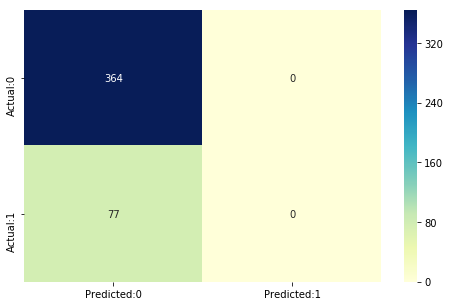

In [180]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  0<font>

**<font color=DarkBlue>True Negatives:**  364<font>

**<font color=DarkBlue>False Positives:** 0 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 77 ( *Type II error*)<font>

In [181]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [182]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8253968253968254 

 The Miss-classification = 1-Accuracy =  0.17460317460317465 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.0 

 Specificity or True Negative Rate = TN / (TN+FP) =  1.0 

 Positive Predictive value = TP / (TP+FP) =  nan 

 Negative predictive Value = TN / (TN+FN) =  0.8253968253968254 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  nan 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  1.0


### Decision Tree

In [183]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

#### Gini Criterion

In [184]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)
giniPred = giniDecisionTree.predict(x_test)
giniPred1 = giniDecisionTree.predict(x_train)
print('Accuracy Score using Decision Tree - gini on train set: ',accuracy_score(y_train, giniPred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Decision Tree - gini on test set: ',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')

print('F1 score using Decision Tree - Gini without any technique',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - Gini without any technique',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Classification Report for Decision tree - gini')
print(classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini on train set:  0.8551992225461613
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score using Decision Tree - gini on test set:  0.8208616780045351
-----------------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - Gini without any technique 0.0
-----------------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - Gini without any technique 0.0
-----------------------------------------------------------------------------------------------------------------------------
Classification Report for Decision tree - gini
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       364
           1       0.00      0.00      0.00        77

   mic

### Entropy Criterion

In [185]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(x_train, y_train)
entropyPred = entropyDecisionTree.predict(x_test)
entropyPred1 = entropyDecisionTree.predict(x_train)
print('Accuracy Score using Decision tree - entropy on train set: ',accuracy_score(y_train, entropyPred1))
print('---------------------------------------------------------------------------------------------------------------')
print('\nAccuracy Score using Decision tree - entropy on test set : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')

print('\nF1 score using Decision tree - Entropy without any technique',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('\nRecall score using  Decision tree - Entropy without any technique',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - Entropy without any technique\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy on train set:  0.8551992225461613
---------------------------------------------------------------------------------------------------------------

Accuracy Score using Decision tree - entropy on test set :  0.8163265306122449
---------------------------------------------------------------------------------------------------------------

F1 score using Decision tree - Entropy without any technique 0.0689655172413793
---------------------------------------------------------------------------------------------------------------

Recall score using  Decision tree - Entropy without any technique 0.03896103896103896
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - Entropy without any technique
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       364
           1       0.30      0.04      0.

### Random Forest

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [187]:
fit_rf = RandomForestClassifier(random_state=42)

In [188]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30, 
                                                        random_state = 101)

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
predictionforest1 = trainedforest.predict(X_Train3)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))
print(classification_report(Y_Train3,predictionforest1))

[[348  23]
 [ 47  23]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       371
           1       0.50      0.33      0.40        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.69      0.63      0.65       441
weighted avg       0.82      0.84      0.83       441

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       862
           1       0.54      0.35      0.43       167

   micro avg       0.85      0.85      0.85      1029
   macro avg       0.71      0.65      0.67      1029
weighted avg       0.83      0.85      0.83      1029



In [189]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None}
Time taken in grid search:  13.57


### SVC

In [190]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set without any techniques : {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set without any techniques : 1.00
Accuracy on test set: 0.83


### Feature Selection - RFE method

In [191]:
x=ibm.drop(['Attrition'],axis=1)
y=ibm['Attrition'].values
cols=list(x.columns)

while(len(cols)>0):
    p=[]
    x1=x[cols]
    x1=sm.add_constant(x1)
    li=sm.OLS(y,x1).fit()
    p=pd.Series(li.pvalues.values[1:],index=cols)
    p_max=max(p) #max pval
    feature_pmax=p.idxmax() # feature name of max pval
    if(p_max>0.05):
        cols.remove(feature_pmax)
        
    else:
        break
selected_cols=cols
print('Using OLS model, features selected are \n', selected_cols)

Using OLS model, features selected are 
 ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


In [192]:
ibm_feature1=ibm[selected_cols]
ibm_feature1.head(2)

,Age,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,RelationshipSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,2,1,1,2,2,3,2,1,4,1,8,1,1,1,4,0
1,49,3,2,8,3,1,2,2,2,2,2,1,0,4,3,7,1


In [193]:

ibm_constant = add_constant(ibm_feature1)
ibm_constant.head()

,const,Age,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,RelationshipSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,1.0,41,2,1,1,2,2,3,2,1,4,1,8,1,1,1,4,0
1,1.0,49,3,2,8,3,1,2,2,2,2,2,1,0,4,3,7,1
2,1.0,37,2,2,2,4,1,2,1,3,3,1,6,1,2,3,0,0
3,1.0,33,3,2,3,4,2,3,1,2,3,2,1,1,3,3,7,3
4,1.0,27,2,2,2,1,1,3,1,3,2,2,9,0,4,3,2,2


### Logistic Regression

In [194]:
x=ibm_constant
y=ibm['Attrition'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
y_pred1=logreg.predict(x_train)

In [195]:
import sklearn
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on test set is ' ,accuracy_score(y_test,y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nAccuracy of the model using Logistic Regression without any imbalance data correction technique on train set is ' ,accuracy_score(y_train,y_pred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nF1 score using logistic regression without any imbalance data correction technique',f1_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nRecall score using Logistic Regression without any imbalance data correction technique',recall_score(y_test, y_pred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('\nClassification report using logistic regression without any imbalance data correction technique\n',classification_report(y_test, y_pred))


Accuracy of the model using Logistic Regression without any imbalance data correction technique on test set is  0.8707482993197279
-----------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Logistic Regression without any imbalance data correction technique on train set is  0.8818027210884354
-----------------------------------------------------------------------------------------------------------------------------

F1 score using logistic regression without any imbalance data correction technique 0.4722222222222222
-----------------------------------------------------------------------------------------------------------------------------

Recall score using Logistic Regression without any imbalance data correction technique 0.3469387755102041
-----------------------------------------------------------------------------------------------------------------------------

Classification repor

#### Confusion Matrix

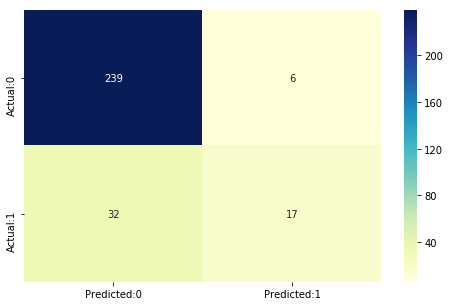

In [196]:

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  17<font>

**<font color=DarkBlue>True Negatives:**  239<font>

**<font color=DarkBlue>False Positives:** 6 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 32 ( *Type II error*)<font>

In [197]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [198]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8707482993197279 

 The Miss-classification = 1-Accuracy =  0.12925170068027214 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.3469387755102041 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9755102040816327 

 Positive Predictive value = TP / (TP+FP) =  0.7391304347826086 

 Negative predictive Value = TN / (TN+FN) =  0.8819188191881919 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  14.16666666666669 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.6694560669456068


### Decision Tree

In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

#### Gini Criterion

In [200]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)
giniPred = giniDecisionTree.predict(x_test)
giniPred1 = giniDecisionTree.predict(x_train)
print('Accuracy Score using Decision Tree - gini on train set: ',accuracy_score(y_train, giniPred1))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Decision Tree - gini on test set: ',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')

print('F1 score using Decision Tree - Gini without any technique',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - Gini without any technique',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Classification Report for Decision tree - gini')
print(classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini on train set:  0.8571428571428571
-----------------------------------------------------------------------------------------------------------------------------
Accuracy Score using Decision Tree - gini on test set:  0.8605442176870748
-----------------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - Gini without any technique 0.40579710144927533
-----------------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - Gini without any technique 0.2857142857142857
-----------------------------------------------------------------------------------------------------------------------------
Classification Report for Decision tree - gini
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.70      0

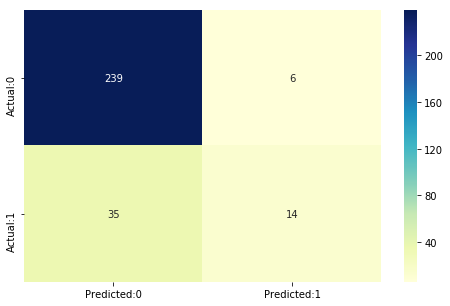

In [201]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [202]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(x_train, y_train)
entropyPred = entropyDecisionTree.predict(x_test)
entropyPred1 = entropyDecisionTree.predict(x_train)
print('Accuracy Score using Decision tree - entropy on train set: ',accuracy_score(y_train, entropyPred1))
print('---------------------------------------------------------------------------------------------------------------')
print('\nAccuracy Score using Decision tree - entropy on test set : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')

print('\nF1 score using Decision tree - Entropy without any technique',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('\nRecall score using  Decision tree - Entropy without any technique',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - Entropy without any technique\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy on train set:  0.8520408163265306
---------------------------------------------------------------------------------------------------------------

Accuracy Score using Decision tree - entropy on test set :  0.8537414965986394
---------------------------------------------------------------------------------------------------------------

F1 score using Decision tree - Entropy without any technique 0.2456140350877193
---------------------------------------------------------------------------------------------------------------

Recall score using  Decision tree - Entropy without any technique 0.14285714285714285
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - Entropy without any technique
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       245
           1       0.88      0.14      0.

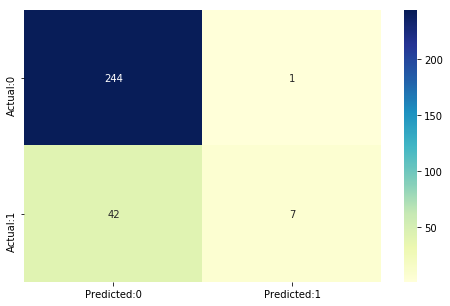

In [203]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Random Forest

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [205]:
fit_rf = RandomForestClassifier(random_state=42)

In [206]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(x_train,y_train)

predictionforest = trainedforest.predict(x_test)
predictionforest1 = trainedforest.predict(x_train)
print(confusion_matrix(y_test,predictionforest))
print('For Test set')
print(classification_report(y_test,predictionforest))
print('For Train set')
print(classification_report(y_train,predictionforest1))

[[244   1]
 [ 35  14]]
For Test set
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       245
           1       0.93      0.29      0.44        49

   micro avg       0.88      0.88      0.88       294
   macro avg       0.90      0.64      0.68       294
weighted avg       0.88      0.88      0.85       294

For Train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

   micro avg       1.00      1.00      1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



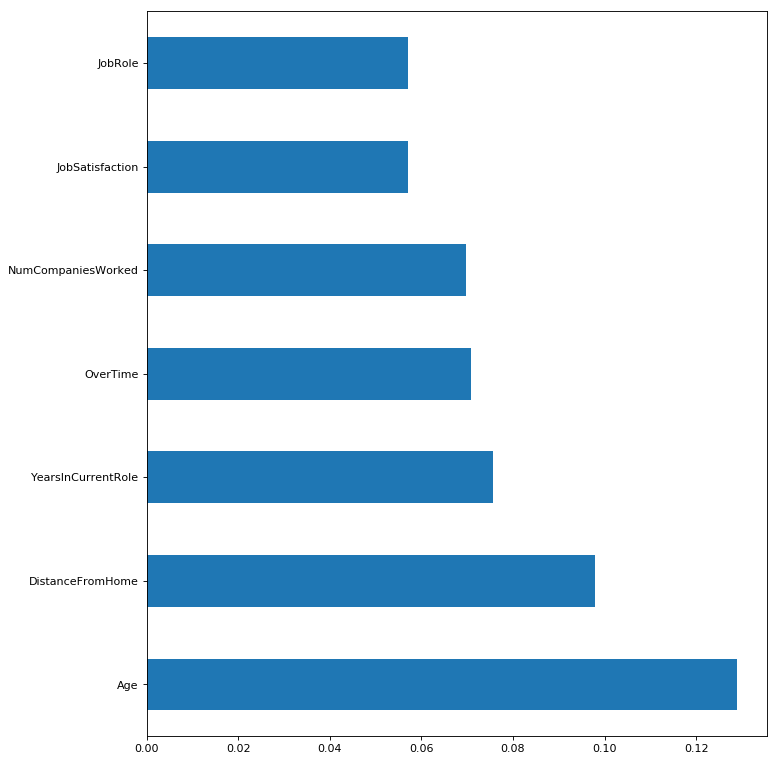

In [207]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= x.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [208]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto'}
Time taken in grid search:  11.14


### SVC

In [209]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set without any techniques : {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set without any techniques : 0.94
Accuracy on test set: 0.83


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Let us find whether the data is balanced or not

In [210]:
## Attrition =1 percentage
print('Percentagee of attrition is ',ibm[ibm['Attrition']==1]['Attrition'].count() / ibm['Attrition'].count() *100)

Percentagee of attrition is  16.122448979591837


In [211]:
## Attrition =0 percentage
print('Percentagee of no-attrition is ',ibm[ibm['Attrition']==0]['Attrition'].count() / ibm['Attrition'].count() *100)

Percentagee of no-attrition is  83.87755102040816


### It is clear that the Attrition rate is less comapared to non-Attrition rate.

#### So we can deal the data with imbalanced data techniques and check for the various accuracy scores

### Oversampling

In [212]:
from sklearn.utils import resample

# Separate input features and target
y = ibm.Attrition
X = ibm_feature1

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_attr = X[X.Attrition==0]
attr = X[X.Attrition==1]

# upsample minority
attr_upsampled = resample(attr,
                          replace=True, # sample with replacement
                          n_samples=len(no_attr), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_attr, attr_upsampled])

# check new class counts
upsampled.Attrition.value_counts()

1    933
0    933
Name: Attrition, dtype: int64

##### Here we are increasing the minority class (attrition =1) to majority class

##### Logistic Regression

In [213]:

y_train = upsampled.Attrition
X_train = upsampled.drop('Attrition', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
print('Accuracy score using Logistic regression after over sampling',accuracy_score(y_test, upsampled_pred))
print('-----------------------------------------------------------------------------------------------------------')
print('F1 score using Logistic regression after over sampling',f1_score(y_test, upsampled_pred) )
print('-----------------------------------------------------------------------------------------------------------')
print('Recall score using Logistic regression after over sampling', recall_score(y_test, upsampled_pred))


Accuracy score using Logistic regression after over sampling 0.7717391304347826
-----------------------------------------------------------------------------------------------------------
F1 score using Logistic regression after over sampling 0.5531914893617021
-----------------------------------------------------------------------------------------------------------
Recall score using Logistic regression after over sampling 0.7647058823529411


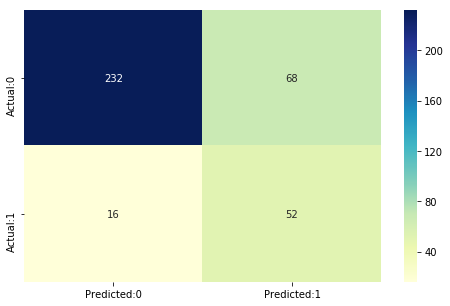

In [214]:

cm=confusion_matrix(y_test,upsampled_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Decision Tree

In [215]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train, y_train)
giniPred = giniDecisionTree.predict(X_test)
print('Accuracy scor0e using Decision Tree - gini after over sampling',accuracy_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------')
print('F1 score using Decision Tree - gini after over sampling',f1_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - gini after over sampling',recall_score(y_test, giniPred))
print('-----------------------------------------------------------------------------------------------------------')
print('Classification Report using Decision Tree - gini after over sampling\n',classification_report(y_test, giniPred))

Accuracy scor0e using Decision Tree - gini after over sampling 0.779891304347826
-----------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - gini after over sampling 0.42553191489361697
-----------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - gini after over sampling 0.4411764705882353
-----------------------------------------------------------------------------------------------------------
Classification Report using Decision Tree - gini after over sampling
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       300
           1       0.41      0.44      0.43        68

   micro avg       0.78      0.78      0.78       368
   macro avg       0.64      0.65      0.64       368
weighted avg       0.79      0.78      0.78       368



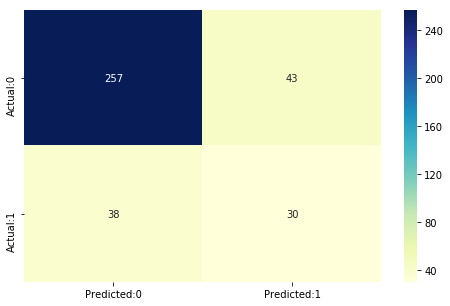

In [216]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [217]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(X_train, y_train)
entropyPred = entropyDecisionTree.predict(X_test)
print('Accuracy score using Decision Tree - entropy after over sampling ',accuracy_score(y_test, entropyPred))
print('-----------------------------------------------------------------------------------------------------------')
print('F1 score using using Decision Tree - entropy after over sampling ',f1_score(y_test, entropyPred))
print('-----------------------------------------------------------------------------------------------------------')
print('Recall score using using Decision Tree - entropy after over sampling ',recall_score(y_test, entropyPred))
print('------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - entropy after oversampling \n',classification_report(y_test, entropyPred))


Accuracy score using Decision Tree - entropy after over sampling  0.779891304347826
-----------------------------------------------------------------------------------------------------------
F1 score using using Decision Tree - entropy after over sampling  0.42553191489361697
-----------------------------------------------------------------------------------------------------------
Recall score using using Decision Tree - entropy after over sampling  0.4411764705882353
------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - entropy after oversampling 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       300
           1       0.41      0.44      0.43        68

   micro avg       0.78      0.78      0.78       368
   macro avg       0.64      0.65      0.64       368
weighted avg       0.79      0.78      0.78       368



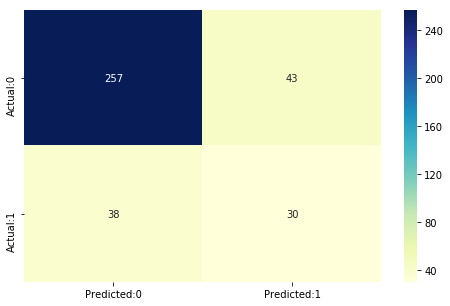

In [218]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### SVC

In [219]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set using SVC after oversampling  : {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set using SVC after oversampling : {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set using SVC after oversampling  : 1.00
Accuracy on test set using SVC after oversampling : 0.84


### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
predictionforest1 = trainedforest.predict(X_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(classification_report(y_train,predictionforest1))

[[288  12]
 [ 40  28]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       300
           1       0.70      0.41      0.52        68

   micro avg       0.86      0.86      0.86       368
   macro avg       0.79      0.69      0.72       368
weighted avg       0.85      0.86      0.84       368

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      1.00      1.00       933

   micro avg       1.00      1.00      1.00      1866
   macro avg       1.00      1.00      1.00      1866
weighted avg       1.00      1.00      1.00      1866



### Under sampling

##### Here we are increasing the minority class (attrition =1) to majority class

In [221]:
no_attr_downsampled = resample(no_attr,
                                replace = False, # sample without replacement
                                n_samples = len(attr), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_attr_downsampled, attr])

# checking counts
downsampled.Attrition.value_counts()

1    169
0    169
Name: Attrition, dtype: int64

##### Here we are decreasing the majority class (attrition =0) to minority class

In [222]:
y_train = downsampled.Attrition
X_train = downsampled.drop('Attrition', axis=1)

downsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

downsampled_pred = downsampled.predict(X_test)

# Checking accuracy
print('Accuracy score using Logistic regression after under sampling ',accuracy_score(y_test, downsampled_pred))
print('---------------------------------------------------------------------------------------------------------------')
print('F1 score using Logistic regression after under sampling ',f1_score(y_test, downsampled_pred) )
print('---------------------------------------------------------------------------------------------------------------')
print('Recall score using Logistic regression after under sampling ',recall_score(y_test, downsampled_pred))

Accuracy score using Logistic regression after under sampling  0.7581521739130435
---------------------------------------------------------------------------------------------------------------
F1 score using Logistic regression after under sampling  0.5340314136125655
---------------------------------------------------------------------------------------------------------------
Recall score using Logistic regression after under sampling  0.75


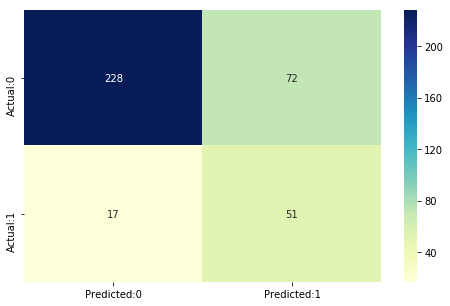

In [223]:

cm=confusion_matrix(y_test,downsampled_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [224]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train, y_train)

giniPred = giniDecisionTree.predict(X_test)
print('Accuracy Score using Decision tree - gini after under sampling : ',accuracy_score(y_test, giniPred))
print('-------------------------------------------------------------------------------------------------------------------')
print('F1 score using Decision tree - gini after under sampling : ',f1_score(y_test, giniPred))
print('-------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision tree - gini after under sampling : ',recall_score(y_test, giniPred))
print('-------------------------------------------------------------------------------------------------------------------')
print('Classification Report using Decision tree - gini after under sampling : \n',classification_report(y_test, giniPred))

Accuracy Score using Decision tree - gini after under sampling :  0.7065217391304348
-------------------------------------------------------------------------------------------------------------------
F1 score using Decision tree - gini after under sampling :  0.4375
-------------------------------------------------------------------------------------------------------------------
Recall score using Decision tree - gini after under sampling :  0.6176470588235294
-------------------------------------------------------------------------------------------------------------------
Classification Report using Decision tree - gini after under sampling : 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       300
           1       0.34      0.62      0.44        68

   micro avg       0.71      0.71      0.71       368
   macro avg       0.62      0.67      0.62       368
weighted avg       0.79      0.71      0.73       368



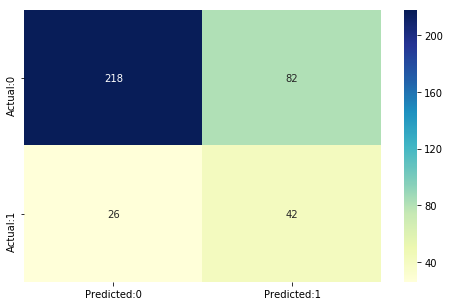

In [225]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [226]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(X_train, y_train)
entropyPred = entropyDecisionTree.predict(X_test)
print('Accuracy Score using Decision tree - entropy with under sampling : ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('F1 score using Decision tree - entropy with under sampling ',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision tree - entropy with under sampling ',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification report using Decision tree - entropy with under sampling\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy with under sampling :  0.6956521739130435
---------------------------------------------------------------------------------------------------------------
F1 score using Decision tree - entropy with under sampling  0.42857142857142855
---------------------------------------------------------------------------------------------------------------
Recall score using Decision tree - entropy with under sampling  0.6176470588235294
---------------------------------------------------------------------------------------------------------------
Classification report using Decision tree - entropy with under sampling
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       300
           1       0.33      0.62      0.43        68

   micro avg       0.70      0.70      0.70       368
   macro avg       0.61      0.67      0.61       368
weighted avg       0.79      0.70      0.73       368



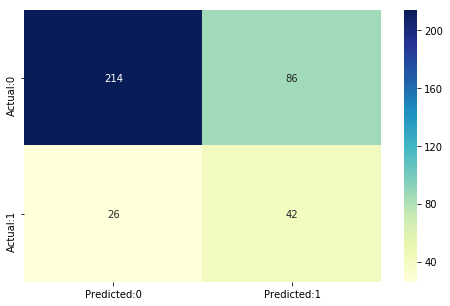

In [227]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [228]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set using SVC with under sampling : {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set using SVC with under sampling: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set using SVC with under sampling : 0.99
Accuracy on test set using SVC with under sampling: 0.58


### Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
predictionforest1 = trainedforest.predict(X_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(classification_report(y_train,predictionforest1))

[[233  67]
 [ 16  52]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       300
           1       0.44      0.76      0.56        68

   micro avg       0.77      0.77      0.77       368
   macro avg       0.69      0.77      0.70       368
weighted avg       0.84      0.77      0.79       368

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338



### SMOTE Analysis

In [230]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = ibm.Attrition
X = ibm_feature1

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

smo = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = smo.fit_sample(X_train, y_train)
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
print('Accuracy Score using Logistic Regression with SMOTE analysis : ',accuracy_score(y_test, smote_pred))
print('--------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Logistic Regression with SMOTE analysis : ',f1_score(y_test, smote_pred))
print('--------------------------------------------------------------------------------------------------------')
print('Accuracy Score using Logistic Regression with SMOTE analysis : ',recall_score(y_test, smote_pred))
    
    


Accuracy Score using Logistic Regression with SMOTE analysis :  0.842391304347826
--------------------------------------------------------------------------------------------------------
Accuracy Score using Logistic Regression with SMOTE analysis :  0.6329113924050633
--------------------------------------------------------------------------------------------------------
Accuracy Score using Logistic Regression with SMOTE analysis :  0.7352941176470589


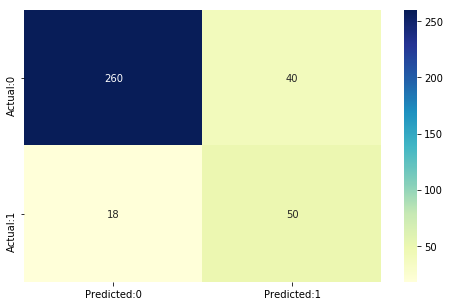

In [231]:

cm=confusion_matrix(y_test,smote_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [232]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train, y_train)
giniPred = giniDecisionTree.predict(X_test)
print('Accuracy Score using Decision Tree - gini with SMOTE analysis: ',accuracy_score(y_test, giniPred))
print('------------------------------------------------------------------------------------------------------------------')
print('F1 score using Decision Tree - gini with SMOTE analysis',f1_score(y_test, giniPred))
print('------------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision Tree - gini with SMOTE analysis',recall_score(y_test, giniPred))
print('------------------------------------------------------------------------------------------------------------------')
print('Classification Report using Decision Tree - gini with SMOTE analysis\n',classification_report(y_test, giniPred))

Accuracy Score using Decision Tree - gini with SMOTE analysis:  0.720108695652174
------------------------------------------------------------------------------------------------------------------
F1 score using Decision Tree - gini with SMOTE analysis 0.38323353293413176
------------------------------------------------------------------------------------------------------------------
Recall score using Decision Tree - gini with SMOTE analysis 0.47058823529411764
------------------------------------------------------------------------------------------------------------------
Classification Report using Decision Tree - gini with SMOTE analysis
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       300
           1       0.32      0.47      0.38        68

   micro avg       0.72      0.72      0.72       368
   macro avg       0.59      0.62      0.60       368
weighted avg       0.77      0.72      0.74       368



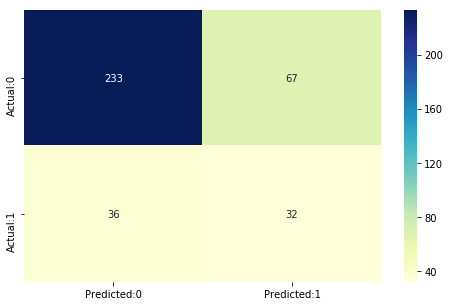

In [233]:

cm=confusion_matrix(y_test,giniPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Entropy Criterion

In [234]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)
entropyDecisionTree.fit(X_train, y_train)
entropyPred = entropyDecisionTree.predict(X_test)
print('Accuracy Score using Decision tree - entropy with SMOTE analysis: ',accuracy_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('F1 score using Decision tree - entropy with SMOTE analysis',f1_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Recall score using Decision tree - entropy with SMOTE analysis',recall_score(y_test, entropyPred))
print('---------------------------------------------------------------------------------------------------------------')
print('Classification Report using Decision tree - entropy with SMOTE analysis\n',classification_report(y_test, entropyPred))

Accuracy Score using Decision tree - entropy with SMOTE analysis:  0.720108695652174
---------------------------------------------------------------------------------------------------------------
F1 score using Decision tree - entropy with SMOTE analysis 0.38323353293413176
---------------------------------------------------------------------------------------------------------------
Recall score using Decision tree - entropy with SMOTE analysis 0.47058823529411764
---------------------------------------------------------------------------------------------------------------
Classification Report using Decision tree - entropy with SMOTE analysis
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       300
           1       0.32      0.47      0.38        68

   micro avg       0.72      0.72      0.72       368
   macro avg       0.59      0.62      0.60       368
weighted avg       0.77      0.72      0.74       368



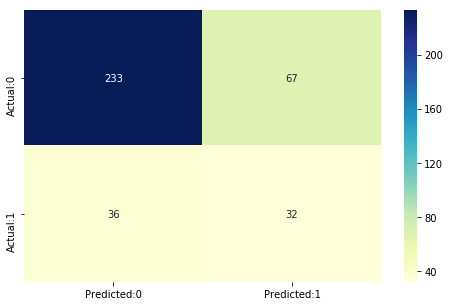

In [235]:

cm=confusion_matrix(y_test,entropyPred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [236]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set using SVC with SMOTE analysis : {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set using SVC with SMOTE analysis : {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set using SVC with SMOTE analysis : 1.00
Accuracy on test set using SVC with SMOTE analysis : 0.81


### Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
predictionforest1 = trainedforest.predict(X_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(classification_report(y_train,predictionforest1))

[[281  19]
 [ 36  32]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       300
           1       0.63      0.47      0.54        68

   micro avg       0.85      0.85      0.85       368
   macro avg       0.76      0.70      0.72       368
weighted avg       0.84      0.85      0.84       368

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      1.00      1.00       933

   micro avg       1.00      1.00      1.00      1866
   macro avg       1.00      1.00      1.00      1866
weighted avg       1.00      1.00      1.00      1866



### Clustering

#### K-means clustering

In [238]:
from sklearn.cluster import KMeans

In [239]:
### here we are using ibm dataset 

In [240]:
x=ibm_feature1
kmeans=KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans.fit(x)
cent1=kmeans.cluster_centers_
cent=pd.DataFrame(cent1,columns=list(x))
x['Attrition']=kmeans.labels_
cent1
c0=cent1[0,:]

c1=cent1[1,:]

kmeans.inertia_

x.Attrition.value_counts()

1    915
0    555
Name: Attrition, dtype: int64

In [241]:
cent

,Age,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,RelationshipSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,46.578378,2.068468,1.769369,9.342342,2.718919,1.412613,2.756757,2.735135,4.093694,2.695495,1.972973,3.527928,0.299099,2.785586,2.763964,5.050450,3.072072
1,31.067760,2.097268,1.721311,9.101639,2.723497,1.392350,2.713661,1.656831,3.225137,2.748634,1.860109,2.186885,0.273224,2.667760,2.759563,3.731148,1.651366


### Here 0 class is people who move out( attrition = 1) and 1 class is people who do not move out (attrition =0)

#### Original count:
##### attrition= 0 :    1233
##### attrition =1 :    237 

#### KNN :

##### attrition=1 : 555
##### attrition=0 : 915



## Aglomerative clustering

In [242]:
from sklearn.cluster import AgglomerativeClustering

### After  giving various affinity and linkage , below are the results

#### Affinity: Cosine                    Linkage: Average
##### Attrition = 0 : 1129
##### Attrition = 1 : 341

#### Affinity: Cosine                    Linkage: Complete
##### Attrition = 0 : 1294
##### Attrition = 1 : 176

#### Affinity: Cosine                    Linkage: Single
##### Attrition = 0 : 1469
##### Attrition = 1 : 1

#### Affinity: Euclidean               Linkage: Ward
##### Attrition = 0 : 1121
##### Attrition = 1 : 349

#### Affinity: Euclidean               Linkage: Average
##### Attrition = 0 : 1402
##### Attrition = 1 : 68

#### Affinity: Euclidean               Linkage: Complete
##### Attrition = 0 : 982
##### Attrition = 1 : 488

#### Affinity: Euclidean               Linkage: Single
##### Attrition = 0 : 1466
##### Attrition = 1 : 4


In [243]:
aggl_cl=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
aggl_cl.fit(ibm_feature1)
L1=pd.DataFrame(aggl_cl.labels_)
L1[0].value_counts()

0    1120
1     350
Name: 0, dtype: int64

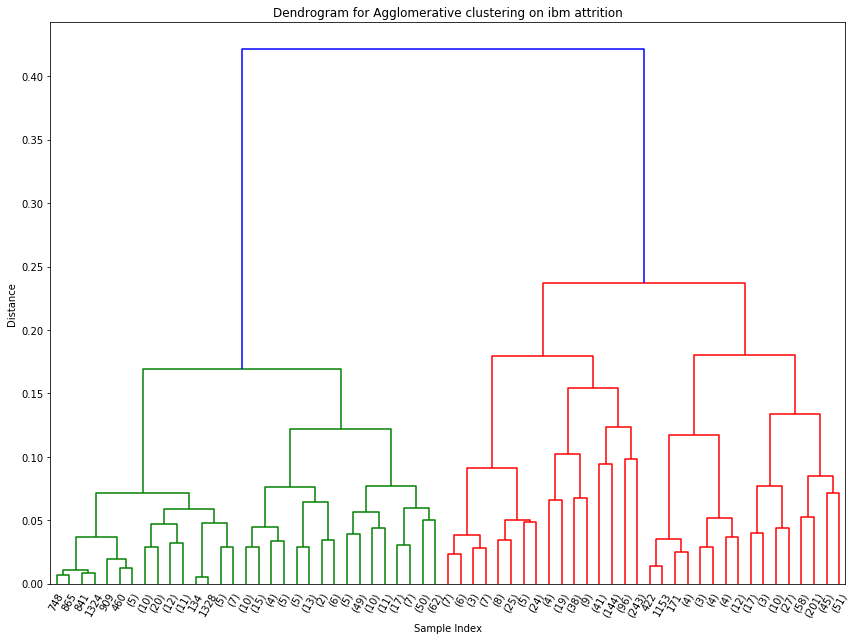

In [244]:
#for ward linkage
import matplotlib.pyplot as plt
%matplotlib inline
from  scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(12,9))
plt.title('Dendrogram for Agglomerative clustering on ibm attrition')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
z=linkage(ibm_feature1,'complete',metric='cosine')
dendrogram(z,leaf_rotation=60.0,p=5,color_threshold=.35,
          leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### PCA

In [245]:
#apply standard scaler transformation


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ibm_std=sc.fit_transform(ibm_feature1)

cov_matrix=np.cov(ibm_std.T)
print('Shape of covariance matrix',cov_matrix.shape)
print('\nCovariance matrix: \n',cov_matrix)

Shape of covariance matrix (18, 18)

Covariance matrix: 
 [[ 1.00068074e+00 -1.18153701e-02  3.19039867e-02 -1.68726795e-03
   1.01533349e-02  3.63352680e-02  2.98402581e-02  5.09951134e-01
   1.59823736e-01 -4.89520722e-03  9.50935996e-02  2.99838730e-01
   2.80814601e-02  5.35711626e-02 -2.15046570e-02  2.13045985e-01
   2.16660756e-01 -8.23921488e-01]
 [-1.18153701e-02  1.00068074e+00  2.64140115e-03 -9.70264161e-03
  -1.13176337e-02  4.49260746e-02  2.93199041e-02 -1.17037920e-02
   2.35535207e-02  8.67185775e-03 -3.09360325e-02 -3.07639120e-02
   4.27806186e-02  8.93237981e-03  4.21166436e-03 -5.34005624e-03
   5.22557528e-03  2.62611950e-02]
 [ 3.19039867e-02  2.64140115e-03  1.00068074e+00 -1.72365291e-02
   1.94084737e-02 -4.16115974e-02  2.46027983e-02 -1.02032516e-01
   4.25325154e-01 -2.10151749e-02  5.61116065e-02  3.59060381e-02
  -7.48606014e-03  2.24296837e-02 -2.64004846e-02 -5.63537827e-02
  -4.00882378e-02 -4.41860008e-02]
 [-1.68726795e-03 -9.70264161e-03 -1.72365291

In [246]:
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)
print('\nEigen values: \n',eigenvalues)

print('\n\nEigen vectors: \n',eigenvectors)


Eigen values: 
 [2.75988974 0.17081305 0.34235823 1.53480273 0.44962009 1.33373001
 0.68111634 0.73972735 0.86596464 0.91186389 0.93114796 1.11547136
 0.96097645 1.09190532 0.9958002  1.02645621 1.05338477 1.04722488]


Eigen vectors: 
 [[-4.99696521e-01  7.25837895e-01  7.55805905e-02  1.65503115e-01
   2.71583818e-02  2.51350191e-01  2.82382783e-01 -1.69972844e-01
   6.03905445e-02  5.36365953e-02  3.36938873e-02  9.73678823e-03
  -3.54475968e-02  1.50028907e-02 -3.91844440e-02 -3.84298555e-02
  -4.24179807e-02  6.13723607e-02]
 [ 1.41607726e-02 -1.52317912e-02 -1.11600669e-02 -1.34186438e-02
   1.99816122e-02 -6.69507119e-02  1.94032120e-02  2.40339407e-02
  -2.00049964e-01  5.69447292e-01 -1.56738418e-01 -4.76864015e-01
  -2.08235152e-01 -2.88482510e-02 -3.26039344e-01 -1.73350272e-01
  -3.73418213e-01 -2.39130552e-01]
 [-3.59763202e-02 -2.29035681e-02 -4.27141670e-01  4.65679632e-01
   1.63590398e-01 -5.29079347e-01  4.41730204e-01  2.30545112e-01
  -2.62316677e-02 -1.68973881e-0

In [247]:
#amke e.value -- e.vector pair

eig_pair=[(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues)) ]
eig_pair

#in e.vectors the data is sorted in col wise
# in e.pair, tha data is sorted in row wise

[(2.7598897429492655,
  array([-0.49969652,  0.01416077, -0.03597632, -0.00219717, -0.0102817 ,
         -0.04061574, -0.01407896, -0.46658684, -0.21657289,  0.02416849,
         -0.09562191, -0.18356824, -0.00605845, -0.04628173, -0.01989465,
         -0.31216373, -0.31906969,  0.48681819])),
 (0.17081305258129872,
  array([ 7.25837895e-01, -1.52317912e-02, -2.29035681e-02,  1.53727812e-02,
         -9.23768193e-03, -1.21339932e-02,  1.00504460e-03, -6.88235292e-02,
          4.80739372e-02, -1.65367488e-02, -1.48402919e-02, -4.16324281e-02,
          6.65765407e-04, -3.40927664e-03,  2.29276949e-02, -4.24694538e-02,
          3.63042453e-02,  6.77494451e-01])),
 (0.3423582288709209,
  array([ 0.07558059, -0.01116007, -0.42714167,  0.01749736,  0.01281802,
         -0.02861595, -0.01162925, -0.65030832,  0.50588404,  0.01249629,
          0.00903499,  0.06994147,  0.013943  ,  0.00633812, -0.03668003,
          0.30414687, -0.05752409, -0.17013214])),
 (1.5348027292704387,
  array([ 0

In [248]:
#to sort the eig pari in sorted way. (PC1, PC2, PC3 ... )
eig_pair.sort()
eig_pair.reverse()
eig_pair

[(2.7598897429492655,
  array([-0.49969652,  0.01416077, -0.03597632, -0.00219717, -0.0102817 ,
         -0.04061574, -0.01407896, -0.46658684, -0.21657289,  0.02416849,
         -0.09562191, -0.18356824, -0.00605845, -0.04628173, -0.01989465,
         -0.31216373, -0.31906969,  0.48681819])),
 (1.5348027292704387,
  array([ 0.16550312, -0.01341864,  0.46567963, -0.07685408, -0.00525404,
         -0.05875405,  0.07512747, -0.10531785,  0.3603857 , -0.06438921,
          0.07153084,  0.34861517,  0.02046698,  0.08725602, -0.05679718,
         -0.48331216, -0.43733387, -0.18073728])),
 (1.3337300056474344,
  array([ 0.25135019, -0.06695071, -0.52907935,  0.07280143, -0.00659791,
          0.08077489,  0.03605727, -0.03344154, -0.54034237,  0.01187703,
         -0.07865277,  0.36788841,  0.11643202,  0.0684664 , -0.12104243,
         -0.25333544, -0.23143972, -0.23205927])),
 (1.1154713581421725,
  array([ 0.00973679, -0.47686402, -0.0447363 ,  0.01628002, -0.32616064,
         -0.4138844

In [249]:
tot=sum(eigenvalues)  #total of all eigen values

var_exp=[(i/tot)*100 for i in sorted(eigenvalues,reverse=True)] #converting e.values to percentage variation

cum_var=np.cumsum(var_exp) #adding up the percentage score.

print('\nCummulative variance explained: ',cum_var)


Cummulative variance explained:  [ 15.32229037  23.84317174  31.24774233  37.44058974  43.50260379
  49.35076038  55.1647186   60.86337385  66.39183376  71.72696002
  76.89648518  81.95894948  86.7665914   90.87339217  94.65479771
  97.15098786  99.05168415 100.        ]


In [250]:
#to get the eigen vectors alone for dot product
eigen_values_sort=[eig_pair[index][0] for index in range(len(eig_pair))]

eigen_vectors_sort=[eig_pair[index][1] for index in range(len(eig_pair))]

print('\nEigen values',eigen_values_sort)
print('\nEigen vectors \n',eigen_vectors_sort)


Eigen values [2.7598897429492655, 1.5348027292704387, 1.3337300056474344, 1.1154713581421725, 1.091905321745724, 1.053384774729269, 1.0472248767120078, 1.0264562147279053, 0.9958001992656546, 0.9609764521644046, 0.9311479633308634, 0.9118638893510612, 0.8659646371311235, 0.7397273548256383, 0.6811163413459658, 0.4496200907010212, 0.3423582288709209, 0.17081305258129872]

Eigen vectors 
 [array([-0.49969652,  0.01416077, -0.03597632, -0.00219717, -0.0102817 ,
       -0.04061574, -0.01407896, -0.46658684, -0.21657289,  0.02416849,
       -0.09562191, -0.18356824, -0.00605845, -0.04628173, -0.01989465,
       -0.31216373, -0.31906969,  0.48681819]), array([ 0.16550312, -0.01341864,  0.46567963, -0.07685408, -0.00525404,
       -0.05875405,  0.07512747, -0.10531785,  0.3603857 , -0.06438921,
        0.07153084,  0.34861517,  0.02046698,  0.08725602, -0.05679718,
       -0.48331216, -0.43733387, -0.18073728]), array([ 0.25135019, -0.06695071, -0.52907935,  0.07280143, -0.00659791,
        

In [251]:
# with 25 PC vectors
#since dropping last 1 PC dim, we get 5% loss. hence 0:7
PC=np.array(eigen_vectors_sort[0:25]).transpose()
PC1=pd.DataFrame(PC)
PC1



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.499697,0.165503,0.251350,0.009737,0.015003,-0.042418,0.061372,-0.038430,-0.039184,-0.035448,0.033694,0.053637,0.060391,-0.169973,0.282383,0.027158,0.075581,0.725838
1,0.014161,-0.013419,-0.066951,-0.476864,-0.028848,-0.373418,-0.239131,-0.173350,-0.326039,-0.208235,-0.156738,0.569447,-0.200050,0.024034,0.019403,0.019982,-0.011160,-0.015232
2,-0.035976,0.465680,-0.529079,-0.044736,0.099734,-0.039596,0.033031,0.048203,0.089908,0.092994,0.096305,-0.016897,-0.026232,0.230545,0.441730,0.163590,-0.427142,-0.022904
3,-0.002197,-0.076854,0.072801,0.016280,0.391848,-0.212845,-0.071196,0.194885,0.638590,-0.455526,0.287750,0.168834,-0.115194,0.053622,-0.055854,-0.014623,0.017497,0.015373
4,-0.010282,-0.005254,-0.006598,-0.326161,0.126955,0.599325,0.203892,0.259428,-0.177565,0.090990,0.458849,0.267272,-0.253705,-0.141382,-0.051604,-0.014354,0.012818,-0.009238
5,-0.040616,-0.058754,0.080775,-0.413884,-0.348506,-0.295048,-0.106027,0.422532,0.041722,0.028357,0.096619,-0.519406,-0.334428,-0.121881,0.095121,-0.020369,-0.028616,-0.012134
6,-0.014079,0.075127,0.036057,0.029864,0.353875,-0.052203,-0.589355,-0.152231,-0.373435,-0.019143,0.468662,-0.308264,0.167587,0.025156,-0.088460,-0.048259,-0.011629,0.001005
7,-0.466587,-0.105318,-0.033442,0.000591,-0.064881,-0.024793,0.051544,-0.031570,-0.001021,-0.061757,-0.012366,-0.003012,0.055551,-0.167327,-0.530255,0.133187,-0.650308,-0.068824
8,-0.216573,0.360386,-0.540342,-0.080895,-0.089209,-0.074358,0.054167,-0.003055,0.076304,-0.043192,0.030034,-0.056873,0.054287,-0.119172,-0.444523,-0.153199,0.505884,0.048074
9,0.024168,-0.064389,0.011877,-0.045302,0.155423,-0.193700,0.589557,-0.513643,-0.173533,-0.201399,0.211409,-0.297374,-0.317898,0.118638,-0.001024,-0.025099,0.012496,-0.016537


In [252]:

proj_2D=pd.DataFrame(np.dot(ibm_std,PC))
proj_2D.shape

(1470, 18)

In [253]:
model1=AgglomerativeClustering(n_clusters=2,affinity='cosine',linkage='average')
model1.fit(proj_2D)
L1=pd.DataFrame(model1.labels_)

#cent1=pd.DataFrame(cent1,columns=list(ab_scale))
L1[0].value_counts()


0    966
1    504
Name: 0, dtype: int64

### Logistic regression using PCA dataframe

In [254]:
y=ibm.Attrition.values
x_train,x_test,y_train,y_test=train_test_split(proj_2D, y, test_size=0.30, random_state=0)

In [255]:
model =LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred1=model.predict(x_train)


In [256]:
model_score = model.score(x_test,y_test)
model_score1 = model.score(x_train,y_train)
print(model_score)
print(model_score1)

0.8798185941043084
0.8814382896015549


In [257]:
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(y_test,y_pred))

[[362   9]
 [ 44  26]]


In [258]:
# f1 score
f1_score(y_test, y_pred) 

0.49523809523809526

In [259]:
recall_score(y_test, y_pred)

0.37142857142857144

In [260]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [261]:
giniPred = giniDecisionTree.predict(x_test)

In [262]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.8526077097505669


In [263]:
# f1 score
print('F1 score using logistic regression without any technique',f1_score(y_test, giniPred))

F1 score using logistic regression without any technique 0.30107526881720437


In [264]:
print('Recall score using Logistic Regression without any technique',recall_score(y_test, giniPred))

Recall score using Logistic Regression without any technique 0.2


In [265]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.61      0.20      0.30        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.74      0.59      0.61       441
weighted avg       0.83      0.85      0.82       441



### Entropy Criterion

In [266]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)

In [267]:
entropyDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [268]:
entropyPred = entropyDecisionTree.predict(x_test)

In [269]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.8321995464852607


In [270]:
# f1 score
print('F1 score using logistic regression without any technique',f1_score(y_test, entropyPred))

F1 score using logistic regression without any technique 0.3508771929824561


In [271]:
print('Recall score using Logistic Regression without any technique',recall_score(y_test, entropyPred))

Recall score using Logistic Regression without any technique 0.2857142857142857


In [272]:
print(classification_report(y_test, entropyPred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       371
           1       0.45      0.29      0.35        70

   micro avg       0.83      0.83      0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.81      0.83      0.82       441



In [273]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)

print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))



Accuracy on training set: 0.90
Accuracy on test set: 0.86


# Cross Validation on Logistic regression after RFE feature selection

### k fold cross validation

In [274]:
X=ibm_feature1
y=ibm.Attrition.values
from sklearn.model_selection import cross_val_score
from sklearn import svm
svmlnr = svm.SVC(C=1, kernel='linear',gamma=0.3)

svmlnr_scores = cross_val_score(svmlnr,X,Y, cv=10)

svmlnr_scores                                             

      

array([0.87837838, 0.86486486, 0.87162162, 0.8707483 , 0.85714286,
       0.85714286, 0.87755102, 0.86986301, 0.89041096, 0.89041096])

In [275]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
svmlnr.fit(x_train,y_train)
y_pred_prob=svmlnr.predict(x_test)


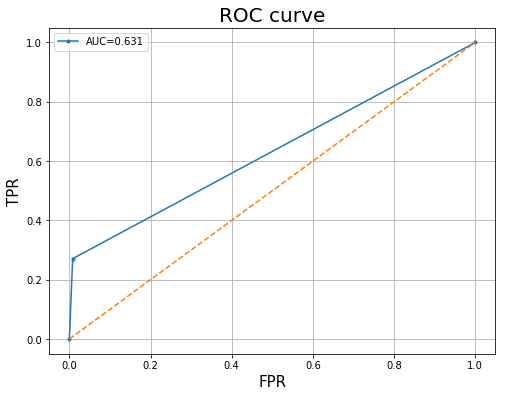

In [276]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [277]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg,X,Y, cv=10)
logreg_scores

array([0.89189189, 0.86486486, 0.87837838, 0.85714286, 0.86394558,
       0.85714286, 0.89115646, 0.87671233, 0.8630137 , 0.90410959])

AttributeError: 'LogisticRegression' object has no attribute 'coefficient_'

In [278]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
NB_scores = cross_val_score(clf,X,Y, cv=10)
NB_scores

array([0.89189189, 0.88513514, 0.83783784, 0.86394558, 0.88435374,
       0.82312925, 0.84353741, 0.8630137 , 0.83561644, 0.87671233])

In [279]:
from sklearn.neighbors import KNeighborsClassifier 
KNNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
KNN_scores = cross_val_score(KNNH,X,Y, cv=10)
KNN_scores

array([0.85135135, 0.83783784, 0.83783784, 0.85034014, 0.83673469,
       0.83673469, 0.85034014, 0.84931507, 0.85616438, 0.84931507])

In [280]:
svmrbf = svm.SVC(C=1, kernel='rbf',gamma=0.2)
svmrbf_scores = cross_val_score(svmrbf, X,Y, cv=10)
svmrbf_scores

array([0.83783784, 0.83783784, 0.83783784, 0.83673469, 0.83673469,
       0.83673469, 0.83673469, 0.84246575, 0.84246575, 0.84246575])

In [281]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_scores = cross_val_score(dt_model,X,Y, cv=10)
dt_scores

array([0.80405405, 0.87162162, 0.81081081, 0.82993197, 0.81632653,
       0.80272109, 0.79591837, 0.80136986, 0.76027397, 0.78082192])

In [282]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
bgcl_scores = cross_val_score(bgcl,X,Y, cv=10)
bgcl_scores

array([0.83783784, 0.85135135, 0.85810811, 0.85714286, 0.87755102,
       0.85714286, 0.87755102, 0.85616438, 0.85616438, 0.8630137 ])

In [283]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 50)
abcl_scores = cross_val_score(abcl,X,Y, cv=10)
abcl_scores

array([0.88513514, 0.86486486, 0.87162162, 0.8707483 , 0.89115646,
       0.85034014, 0.87755102, 0.89726027, 0.86986301, 0.89726027])

In [284]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl_scores = cross_val_score(gbcl,X,Y, cv=10)
gbcl_scores

array([0.86486486, 0.85135135, 0.87162162, 0.85714286, 0.86394558,
       0.83673469, 0.85034014, 0.84246575, 0.85616438, 0.85616438])

In [285]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl_scores = cross_val_score(rfcl,X,Y, cv=10)
rfcl_scores

array([0.85810811, 0.84459459, 0.87162162, 0.86394558, 0.87755102,
       0.85034014, 0.85034014, 0.86986301, 0.85616438, 0.87671233])

In [286]:
cross_val_scores_df = pd.DataFrame(np.hstack((logreg_scores,NB_scores,KNN_scores,svmlnr_scores,svmrbf_scores,dt_scores,bgcl_scores,abcl_scores,gbcl_scores,rfcl_scores)))

In [287]:
cross_val_scores_df['Method'] = ["Mthod"]*100
cross_val_scores_df.columns = ["Scores","Method"]
for i in range(100):
    if i < 10:
        cross_val_scores_df.loc[i,'Method'] = 'Lgt_Regrsn'
    elif (i >= 10) and (i < 20):
        cross_val_scores_df.loc[i,'Method'] = 'Naive_Bayes'
    elif (i >= 20) and (i < 30):
        cross_val_scores_df.loc[i,'Method'] = 'KNN'
    elif (i >= 30) and (i < 40):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_Linear'
    elif (i >= 40) and (i < 50):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_RBF'
    elif (i >= 50) and (i < 60):
        cross_val_scores_df.loc[i,'Method'] = 'Decision_Tree'
    elif (i >= 60) and (i < 70):
        cross_val_scores_df.loc[i,'Method'] = 'Bagging'
    elif (i >= 70) and (i < 80):
        cross_val_scores_df.loc[i,'Method'] = 'Ada_Boost'
    elif (i >= 80) and (i < 90):
        cross_val_scores_df.loc[i,'Method'] = 'Grad_Boost'
    elif (i >= 90) and (i < 100):\
        cross_val_scores_df.loc[i,'Method'] = 'Random_Forest'

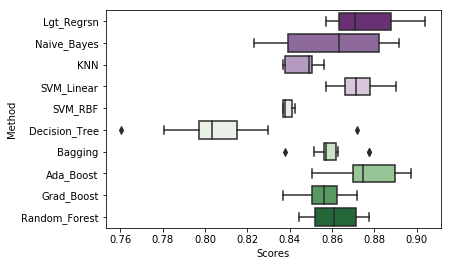

In [288]:
sns.boxplot(x="Scores", y="Method", data=cross_val_scores_df, palette="PRGn")

In [289]:
data=ibm[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]
n_iterations = 100                # Number of bootstrap samples to create
n_size = int(len(data) * 0.70)   # picking only 70 % of the given data in every bootstrap sample
print(round(n_size*0.7))

720


In [295]:
ibm_feature1.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition'],
      dtype='object')

In [291]:
values =  data.values

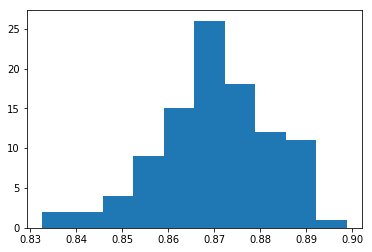

95.0 confidence interval 84.4% and 89.0%


In [292]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy
stats1 = list()
for i in range(n_iterations):
      
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])

    model = svm.SVC(C=1, kernel='linear',gamma=0.4)
    model.fit(train[:,:-1], train[:,-1])

    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    
    stats1.append(score)
    
    
from matplotlib import pyplot
pyplot.hist(stats1)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats1, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats1, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [294]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
x1=ibm.drop('Attrition',axis=1)
y1=ibm.Attrition.values
x1_constant = sm.add_constant(x1)
lin_reg = sm.OLS(y1,x1_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.99e-63
Time:                        11:21:03   Log-Likelihood:                -419.32
No. Observations:                1470   AIC:                             902.6
Df Residuals:                    1438   BIC:                             1072.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9163      0.136      6.742      0.000       0.650       1.183
Age                         -0.0036      0.001     -2.735      0.006      -0.006      -0.001
BusinessTravel               0.0802      0.016      4.997      0.000       0.049       0.112
DailyRate                -3.037e-05   2.13e-05     -1.426      0.154   -7.22e-05    1.14e-05
Department                  -0.0708      0.019     -3.712      0.000      -0.108      -0.033
DistanceFromHome             0.0036      0.001      3.437      0.001       0.002       0.006
Education                    0.0008      0.009      0.096      0.923      -0.016       0.018
EducationField               0.0095      0.007      1.322      0.187      -0.005       0.024
EmployeeNumber           -8.873e-06   1.43e-05     -0.622      0.534   -3.69e-05    1.91e-05
EnvironmentSatisfaction     -0.0402      0.008     -5.125      0.000      -0.056      -0.025
Gender                      -0.0416      0.018     -2.375      0.018      -0.076      -0.007
HourlyRate                  -0.0002      0.000     -0.475      0.635      -0.001       0.001
JobInvolvement              -0.0616      0.012     -5.116      0.000      -0.085      -0.038
JobLevel                    -0.0258      0.026     -0.984      0.325      -0.077       0.026
JobRole                      0.0143      0.005      3.089      0.002       0.005       0.023
JobSatisfaction             -0.0384      0.008     -4.934      0.000      -0.054      -0.023
MaritalStatus               -0.0550      0.016     -3.483      0.001      -0.086      -0.024
MonthlyIncome            -4.026e-06   6.17e-06     -0.653      0.514   -1.61e-05    8.07e-06
MonthlyRate               5.528e-07    1.2e-06      0.460      0.646   -1.81e-06    2.91e-06
NumCompaniesWorked           0.0176      0.004      4.600      0.000       0.010       0.025
OverTime                     0.2073      0.019     10.846      0.000       0.170       0.245
PercentSalaryHike           -0.0040      0.004     -1.086      0.278      -0.011       0.003
PerformanceRating            0.0278      0.037      0.745      0.457      -0.045       0.101
RelationshipSatisfaction    -0.0221      0.008     -2.775      0.006      -0.038      -0.006
StockOptionLevel            -0.0216      0.013     -1.601      0.110      -0.048       0.005
TotalWorkingYears           -0.0033      0.002     -1.394      0.163      -0.008       0.001
TrainingTimesLastYear       -0.0123      0.007     -1.855      0.064      -0.025       0.001
WorkLifeBalance             -0.0304      0.012     -2.500      0.013      -0.054      -0.007
YearsAtCompany               0.0062      0.003      2.096      0.036       0.000       0.012
YearsInCurrentRole          -0.0101      0.004     -2.611      0.009      -0.018      -0.003
YearsSinceLast

# Conclusion
## Apart from Ensemble Method, Logistic and SVM Linear Produced decent accuracy in 10 fold Cross Validation
## Considering Ensemble, AdaBoost and Gradient Boost showed High Accuracy Scores
## Model with the Least accuracy score is Decision tree and random forest
## Gradient Boost, SVM RBF  are having lesser variance with Good Accuracy Score
## We chose SVM-Linear as final model because of,
### 1. Good Accuracy Range
### 2. No visible outliers
### 3. No drastic shift of Median
### 4. Less Variance



## without ensemble technique, we can see that SVM-LR produced better accuracy with range of 85-88% with this implementation